### Análise e Visualização de Dados: Explorando o Mercado de Pizzas

Neste projeto, realizamos uma análise detalhada do mercado de pizzas com o objetivo de fornecer insights valiosos para proprietários de pizzarias e empresários do setor alimentício. Utilizamos técnicas de análise de dados e visualizações gráficas para compreender melhor as tendências, preferências dos clientes e padrões sazonais nas vendas de pizzas.

Começamos examinando um extenso conjunto de dados que continha informações sobre vendas de pizzas, incluindo detalhes como data, hora, quantidade, preço unitário, tamanho, categoria, tipo de pizza e ingredientes. Com base nessas informações, formulamos perguntas de negócios relevantes e realizamos análises específicas para respondê-las.

Primeiramente, investigamos a distribuição de tamanhos de pizza vendidos, o que nos permitiu identificar os tamanhos mais populares entre os clientes. Essa análise é fundamental para ajustes no estoque e na produção, garantindo que a oferta de pizzas atenda à demanda do mercado.

Em seguida, exploramos as vendas de pizza ao longo do tempo, buscando padrões sazonais e tendências de crescimento ou decrescimento. Utilizamos métodos estatísticos, como a decomposição de séries temporais, e modelos de regressão linear para compreender melhor esses padrões e prever as vendas futuras.

Além disso, analisamos a média de preço unitário por categoria de pizza, o que nos permitiu entender a percepção de valor dos clientes para diferentes tipos de pizzas. Essa análise é crucial para o desenvolvimento de estratégias de preços competitivos e eficazes.

Por fim, exploramos as combinações de ingredientes mais populares em pedidos de pizza. Identificar essas combinações nos ajudou a entender as preferências dos clientes e orientar a criação de novos sabores de pizza ou promoções baseadas nas preferências do público-alvo.

Por meio dessas análises e visualizações, esperamos fornecer informações valiosas e perspicazes para os profissionais do setor de pizzas, capacitando-os a tomar decisões informadas e estratégicas para impulsionar seus negócios e atender às necessidades dos clientes de forma eficaz.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_excel('pizzaria_limpo.xlsx')
df.head(3)

id_venda  id_pedido       data      hora  quantidade  preco_unitario  \
0         1          1 2015-01-01  11:38:36           1           13.25   
1         2          2 2015-01-01  11:57:40           1           16.00   
2         3          2 2015-01-01  11:57:40           1           18.50   

   preco_total  tamanho    categoria            pizza  \
0        13.25        6     Clássica         Havaiana   
1        16.00        6     Clássica  Clássica Deluxe   
2        18.50        8  Vegetariana    Cinco Queijos   

                                        ingredientes  
0      Presunto em Fatias, Abacaxi, Queijo Mussarela  
1  Pepperoni, Cogumelos, Cebolas Vermelhas, Pimen...  
2  Queijo Mussarela, Queijo Provolone, Queijo Gou...

**1. Qual é o total de vendas por categoria de pizza ao longo do tempo?**

**Transformação:** Agrupar as vendas por categoria de pizza e calcular o total de vendas para cada categoria em intervalos de tempo (diário, semanal, mensal, etc.).

**Benefícios:** Isso ajudará a identificar quais categorias de pizza são mais populares em diferentes períodos de tempo, possibilitando ajustes no estoque e na estratégia de marketing.

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Converter as colunas 'data' e 'hora' para datetime
df['data'] = pd.to_datetime(df['data'])
df['hora'] = pd.to_datetime(df['hora'])

# Criar uma nova coluna com a data e hora combinadas
df['data_hora'] = df['data'] + pd.to_timedelta(df['hora'].dt.hour, unit='h')

# Agrupar as vendas por categoria de pizza e data
vendas_por_categoria = df.groupby([df['data_hora'].dt.date, 'categoria'])['preco_total'].sum().reset_index()

# Plotar o total de vendas por categoria ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendas_por_categoria, x='data_hora', y='preco_total', hue='categoria')
plt.title('Total de Vendas por Categoria de Pizza ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoria de Pizza')
plt.show()

In [6]:
# Criar uma lista de categorias de pizza únicas
categorias_unicas = df['categoria'].unique()

# Criar subplots 2x2 para cada categoria de pizza separadamente
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# Iterar sobre cada categoria de pizza e plotar o total de vendas ao longo do tempo
for i, categoria in enumerate(categorias_unicas):
    # Filtrar os dados para a categoria atual
    dados_categoria = df[df['categoria'] == categoria]
    # Agrupar as vendas por data e calcular o total de vendas para cada data
    vendas_por_data = dados_categoria.groupby(dados_categoria['data_hora'].dt.date)['preco_total'].sum().reset_index()
    # Plotar o gráfico para a categoria atual
    sns.lineplot(data=vendas_por_data, x='data_hora', y='preco_total', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Total de Vendas - {categoria}')
    axs[i//2, i%2].set_xlabel('Data')
    axs[i//2, i%2].set_ylabel('Total de Vendas')

# Ajustar o layout
plt.tight_layout()
plt.show()

**2. Qual é a média de preço total por pedido ao longo do tempo?**

**Transformação:** Calcular o preço total de cada pedido e então calcular a média desses valores em intervalos de tempo.

**Benefícios:** Isso pode fornecer insights sobre as preferências dos clientes e a disposição de gastar em diferentes momentos, o que pode informar estratégias de preços e promoções.

In [7]:
# Calcular o preço total de cada pedido
df['preco_total_pedido'] = df['quantidade'] * df['preco_total']

# Agrupar os pedidos por data e calcular a média do preço total por pedido
media_preco_total_por_pedido = df.groupby(df['data_hora'].dt.date)['preco_total_pedido'].mean().reset_index()

# Plotar a média de preço total por pedido ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_preco_total_por_pedido, x='data_hora', y='preco_total_pedido')
plt.title('Média de Preço Total por Pedido ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Média de Preço Total por Pedido')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. Quais são as combinações de ingredientes mais populares em pedidos de pizza?**

**Transformação:** Analisar os ingredientes listados em cada pedido e contar a frequência de cada combinação de ingredientes.

**Benefícios:** Isso permitirá identificar quais combinações de ingredientes são mais populares entre os clientes, possibilitando a criação de novas pizzas ou promoções com base nas preferências dos clientes.

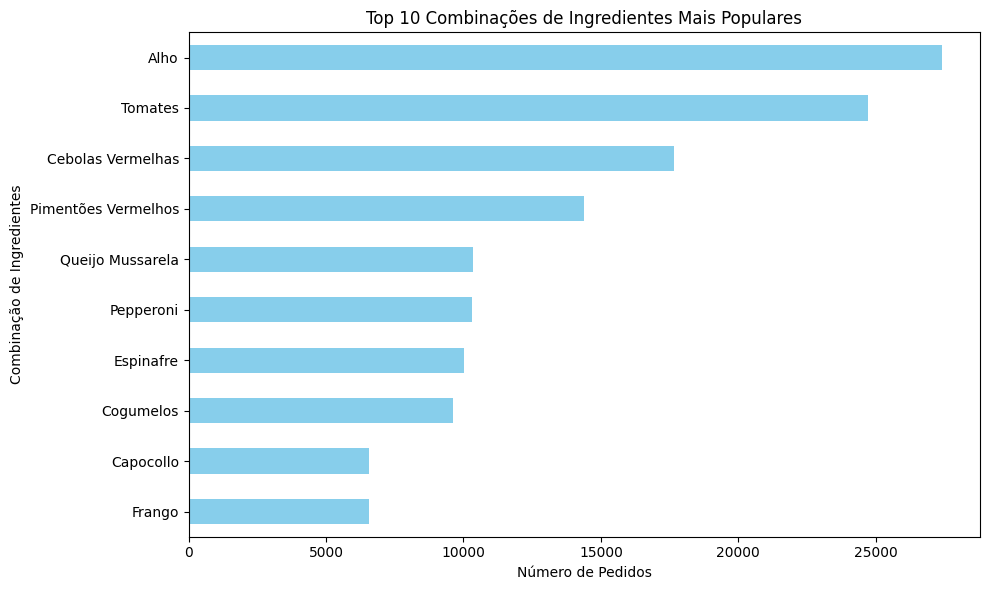

In [8]:
# Criar uma lista de todos os ingredientes únicos
todos_ingredientes = []
for lista_ingredientes in df['ingredientes']:
    ingredientes = lista_ingredientes.split(', ')
    todos_ingredientes.extend(ingredientes)

# Contar a frequência de cada combinação de ingredientes
frequencia_ingredientes = pd.Series(todos_ingredientes).value_counts()

# Selecionar as 10 combinações de ingredientes mais populares
top_ingredientes = frequencia_ingredientes.head(10)

# Plotar um gráfico de barras horizontais das combinações de ingredientes mais populares
plt.figure(figsize=(10, 6))
top_ingredientes.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Combinações de Ingredientes Mais Populares')
plt.xlabel('Número de Pedidos')
plt.ylabel('Combinação de Ingredientes')
plt.tight_layout()
plt.show()

**4. Qual é a média de preço unitário por categoria de pizza?**

**Transformação:** Calcular a média do preço unitário para cada categoria de pizza.

**Benefícios:** Isso pode revelar insights sobre a percepção de valor dos clientes para diferentes tipos de pizza, auxiliando na definição de preços competitivos e estratégias de precificação.

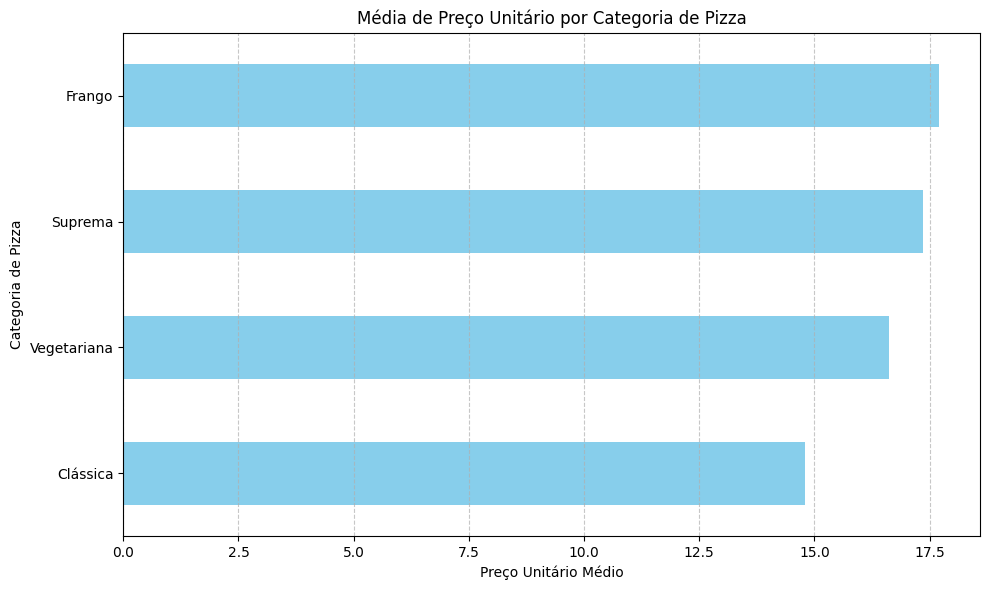

In [11]:
# Calcular a média do preço unitário por categoria de pizza
media_preco_por_categoria = df.groupby('categoria')['preco_unitario'].mean().sort_values()

# Plotar a média do preço unitário por categoria de pizza
plt.figure(figsize=(10, 6))
media_preco_por_categoria.plot(kind='barh', color='skyblue')
plt.title('Média de Preço Unitário por Categoria de Pizza')
plt.xlabel('Preço Unitário Médio')
plt.ylabel('Categoria de Pizza')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**5. Existe alguma sazonalidade nas vendas de pizza?**

**Transformação: Analisar as vendas ao longo do tempo e identificar padrões sazonais ou tendências.**

**Benefícios:** Compreender a sazonalidade nas vendas de pizza pode ajudar na previsão da demanda, no planejamento de estoque e no ajuste de estratégias de marketing sazonais.

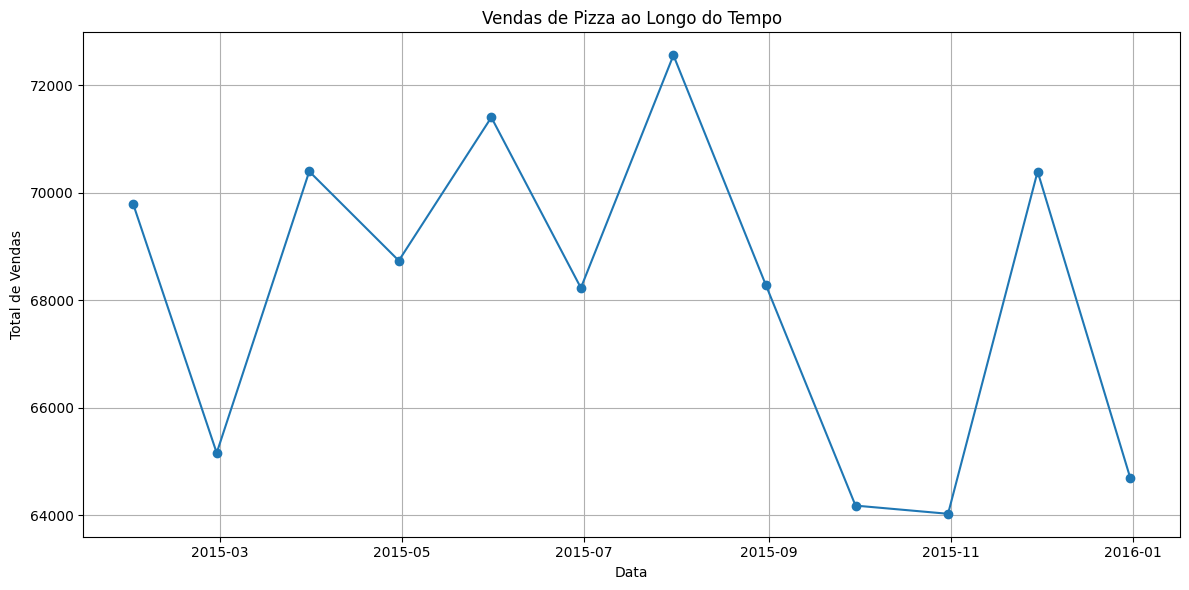

In [12]:
# Agrupar as vendas por mês e calcular o total de vendas
vendas_por_mes = df.resample('M', on='data')['preco_total'].sum()

# Plotar as vendas de pizza ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_mes, marker='o', linestyle='-')
plt.title('Vendas de Pizza ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.tight_layout()
plt.show()

Para identificar padrões sazonais ou tendências, também podemos usar técnicas como média móvel ou decomposição de séries temporais. Por exemplo, podemos calcular a média móvel de 12 meses para suavizar os dados e identificar tendências de longo prazo.

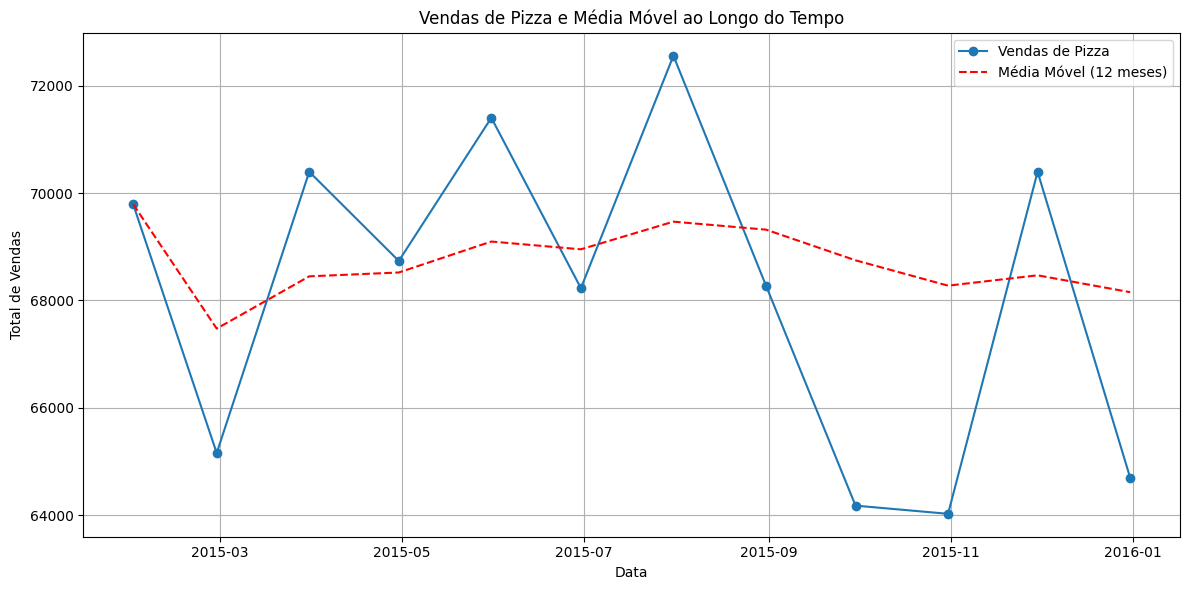

In [14]:
# Agrupar as vendas por mês e calcular o total de vendas
vendas_por_mes = df.resample('M', on='data')['preco_total'].sum()

# Calcular a média móvel de 12 meses
media_movel = vendas_por_mes.rolling(window=12, min_periods=1).mean()  # Adicionamos min_periods=1 para calcular a média móvel mesmo com menos de 12 meses de dados

# Plotar as vendas de pizza e a média móvel ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_mes, marker='o', linestyle='-', label='Vendas de Pizza')
plt.plot(media_movel, linestyle='--', color='red', label='Média Móvel (12 meses)')
plt.title('Vendas de Pizza e Média Móvel ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**6. Qual é a distribuição de tamanhos de pizza vendidos?**

**Transformação:** Contar a quantidade de cada tamanho de pizza vendido.

**Benefícios:** Isso ajudará a entender quais tamanhos de pizza são mais populares entre os clientes, permitindo ajustes no estoque e na produção para atender à demanda.

In [15]:
# Contar a quantidade de cada tamanho de pizza vendido
tamanhos_count = df['tamanho'].value_counts()

# Plotar a distribuição de tamanhos de pizza vendidos
plt.figure(figsize=(8, 6))
tamanhos_count.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Tamanhos de Pizza Vendidos')
plt.xlabel('Tamanho da Pizza')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

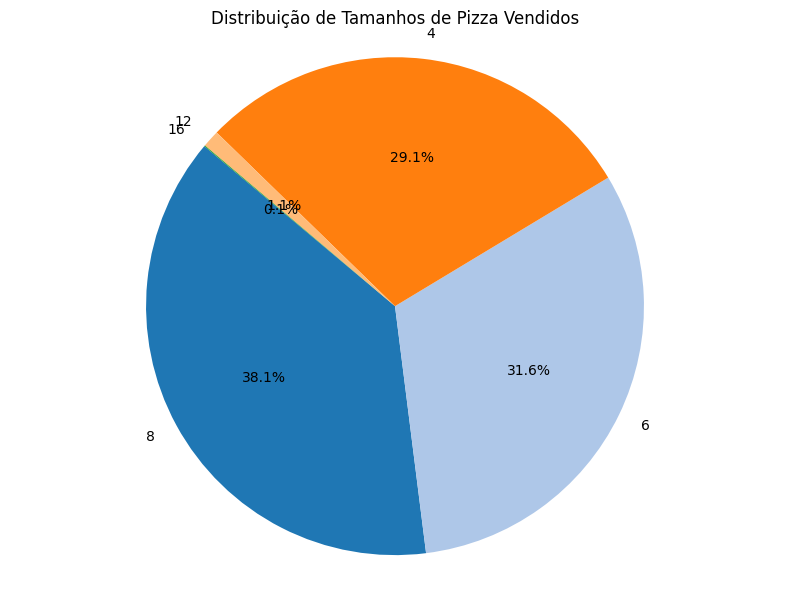

In [16]:
# Plotar a distribuição de tamanhos de pizza vendidos em um gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(tamanhos_count, labels=tamanhos_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribuição de Tamanhos de Pizza Vendidos')
plt.axis('equal')
plt.tight_layout()
plt.show()

Ajustaremos um modelo de regressão linear simples usando a biblioteca scikit-learn, utilizando a variável de tempo como um indicador do período de vendas.

O modelo de regressão linear foi utilizado para prever as vendas de pizza com base no tempo. Isso nos permite entender melhor as tendências de vendas ao longo do tempo e prever futuras vendas com base nos padrões históricos.

A visualização gerada mostra as vendas reais de pizza ao longo do tempo, representadas pela linha sólida, e a previsão do modelo de regressão linear, representada pela linha tracejada em vermelho. Isso nos permite identificar tendências de crescimento ou decrescimento nas vendas de pizza em relação ao tempo, o que pode ser útil para o planejamento de estoque e produção para atender à demanda dos clientes.

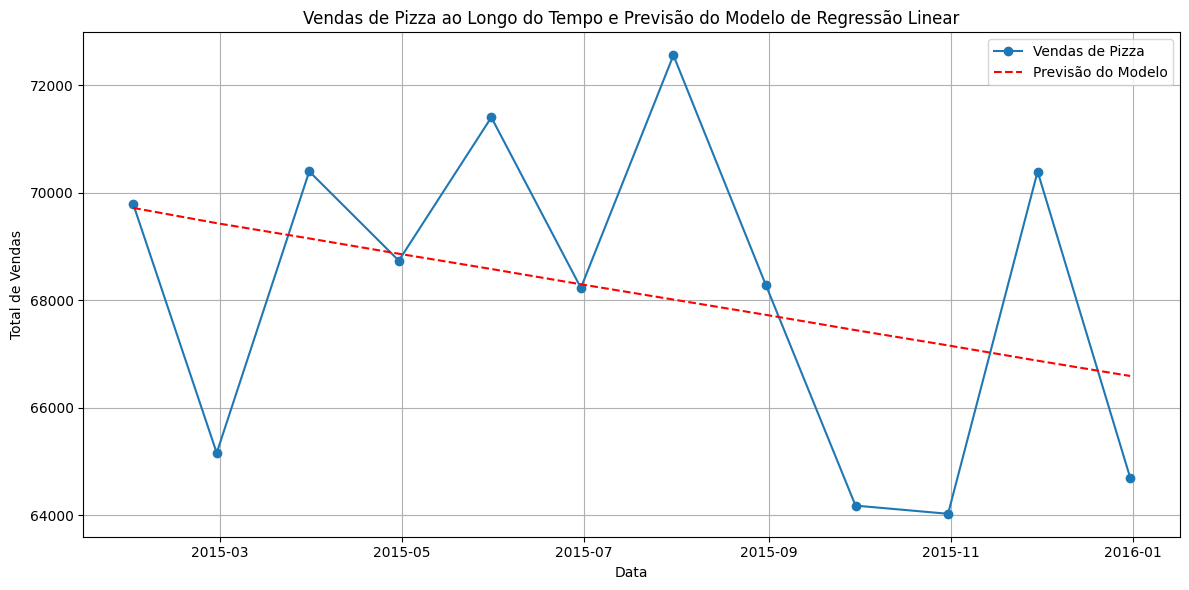

In [21]:
import numpy as np
import statsmodels.api as sm

# Agrupar as vendas por mês e calcular o total de vendas
vendas_por_mes = df.resample('M', on='data')['preco_total'].sum()

# Adicionar uma variável de tempo
vendas_por_mes = pd.DataFrame({'data': vendas_por_mes.index, 'vendas': vendas_por_mes.values})
vendas_por_mes['tempo'] = np.arange(len(vendas_por_mes))

# Adicionar uma constante ao modelo
X = sm.add_constant(vendas_por_mes['tempo'])

# Ajustar um modelo de regressão linear
modelo = sm.OLS(vendas_por_mes['vendas'], X)
resultado = modelo.fit()

# Plotar as vendas de pizza e a previsão do modelo
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_mes['data'], vendas_por_mes['vendas'], marker='o', linestyle='-', label='Vendas de Pizza')
plt.plot(vendas_por_mes['data'], resultado.fittedvalues, linestyle='--', color='red', label='Previsão do Modelo')
plt.title('Vendas de Pizza ao Longo do Tempo e Previsão do Modelo de Regressão Linear')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

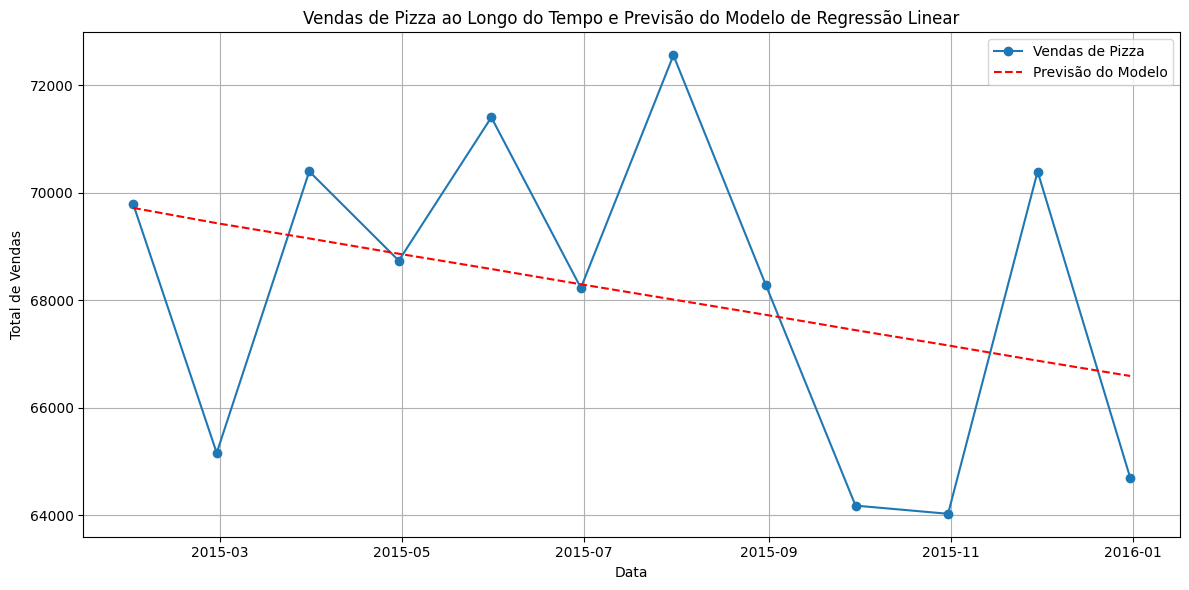

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Agrupar as vendas por mês e calcular o total de vendas
vendas_por_mes = df.resample('M', on='data')['preco_total'].sum().reset_index()

# Adicionar uma variável de tempo
vendas_por_mes['tempo'] = np.arange(len(vendas_por_mes))

# Ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(vendas_por_mes[['tempo']], vendas_por_mes['preco_total'])

# Prever as vendas usando o modelo
vendas_por_mes['previsao'] = modelo.predict(vendas_por_mes[['tempo']])

# Plotar as vendas de pizza e a previsão do modelo
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_mes['data'], vendas_por_mes['preco_total'], marker='o', linestyle='-', label='Vendas de Pizza')
plt.plot(vendas_por_mes['data'], vendas_por_mes['previsao'], linestyle='--', color='red', label='Previsão do Modelo')
plt.title('Vendas de Pizza ao Longo do Tempo e Previsão do Modelo de Regressão Linear')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**7. Análise das Combinações de Ingredientes Mais Populares em Pedidos de Pizza**

Para entender as preferências dos clientes e identificar as combinações de ingredientes mais populares em pedidos de pizza, realizamos uma análise das combinações de ingredientes presentes em nossos dados. Essa análise nos permite criar novas pizzas ou promoções com base nas preferências dos clientes, contribuindo para a satisfação do cliente e o aumento das vendas.

**Nuvem de Palavras para Ingredientes:**

A nuvem de palavras abaixo apresenta visualmente as combinações de ingredientes mais populares em nossos pedidos de pizza. Quanto maior o tamanho da palavra, mais frequente é a presença dessa combinação de ingredientes nos pedidos.

Essa visualização nos permite identificar rapidamente os ingredientes mais comuns e suas combinações preferidas pelos clientes. Com base nesses insights, podemos desenvolver novas pizzas ou promoções que atendam às preferências dos clientes e impulsionem as vendas.

**Observação:** As palavras podem aparecer em diferentes tamanhos devido à sua frequência nos pedidos de pizza. Cada palavra representa um ingrediente presente em nossos dados, e sua presença reflete a popularidade dessa combinação de ingredientes entre nossos clientes.

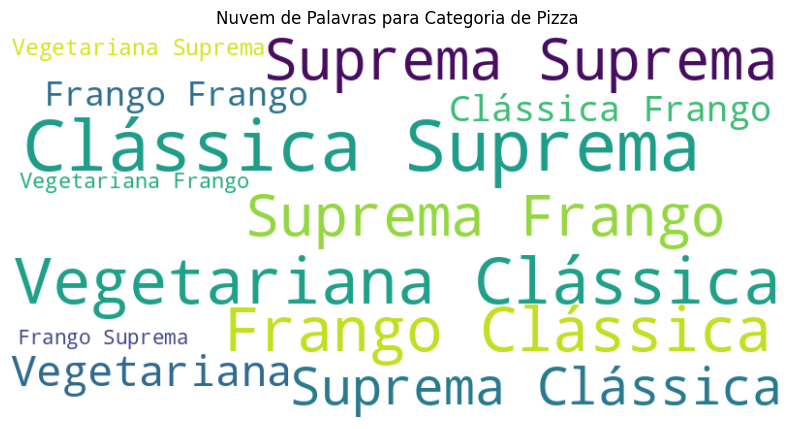

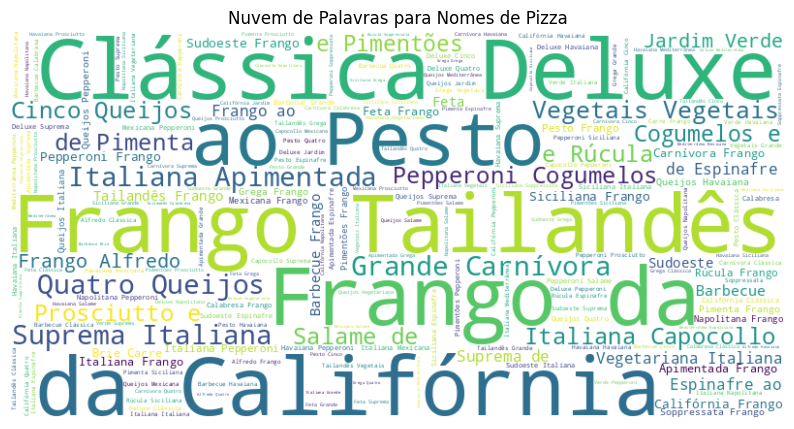

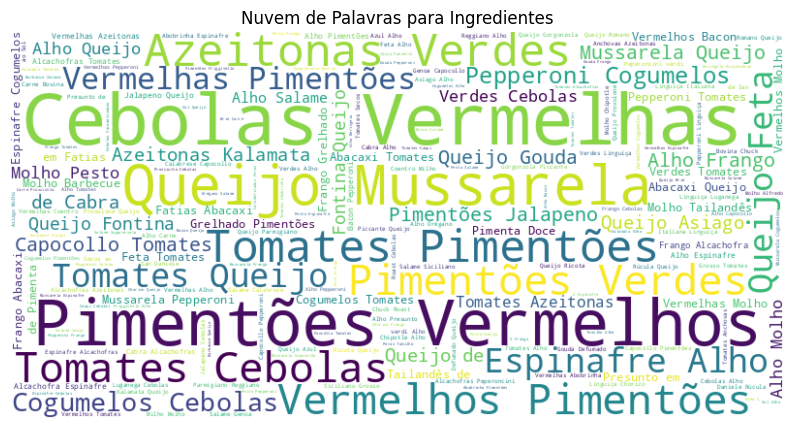

In [9]:
from wordcloud import WordCloud

# Criar nuvem de palavras para Categoria
categoria_text = ' '.join(df['categoria'])
categoria_cloud = WordCloud(width=800, height=400, background_color='white').generate(categoria_text)

# Plotar a nuvem de palavras para Categoria
plt.figure(figsize=(10, 6))
plt.imshow(categoria_cloud, interpolation='bilinear')
plt.title('Nuvem de Palavras para Categoria de Pizza')
plt.axis('off')
plt.show()

# Criar nuvem de palavras para Pizza
pizza_text = ' '.join(df['pizza'])
pizza_cloud = WordCloud(width=800, height=400, background_color='white').generate(pizza_text)

# Plotar a nuvem de palavras para Pizza
plt.figure(figsize=(10, 6))
plt.imshow(pizza_cloud, interpolation='bilinear')
plt.title('Nuvem de Palavras para Nomes de Pizza')
plt.axis('off')
plt.show()

# Criar nuvem de palavras para Ingredientes
ingredientes_text = ' '.join([str(ingrediente).replace(',', '') for ingrediente in df['ingredientes']])
ingredientes_cloud = WordCloud(width=800, height=400, background_color='white').generate(ingredientes_text)

# Plotar a nuvem de palavras para Ingredientes
plt.figure(figsize=(10, 6))
plt.imshow(ingredientes_cloud, interpolation='bilinear')
plt.title('Nuvem de Palavras para Ingredientes')
plt.axis('off')
plt.show()

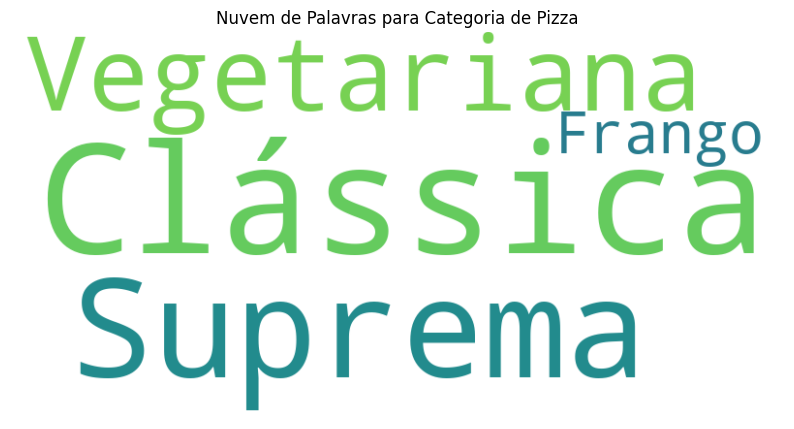

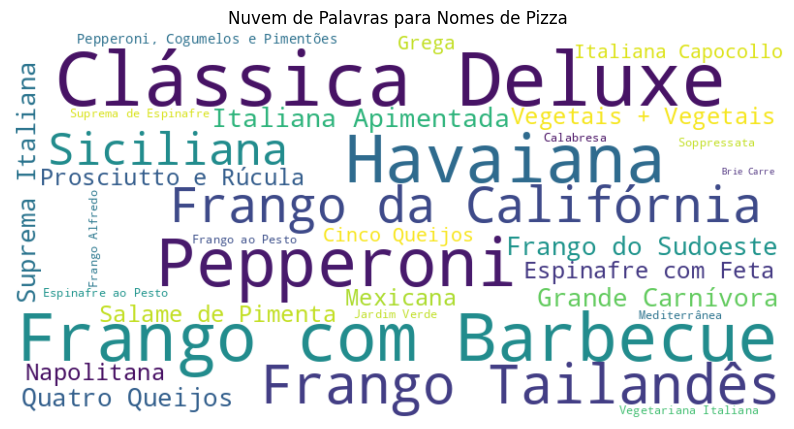

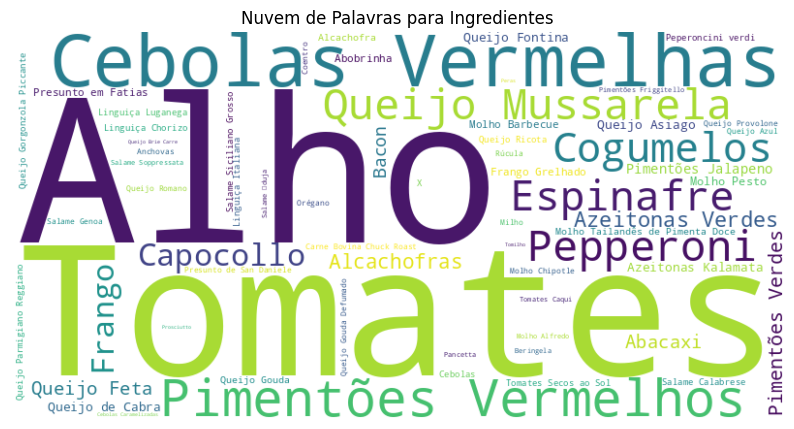

In [10]:
# Criar nuvem de palavras para Categoria
categoria_counts = df['categoria'].value_counts()
categoria_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(categoria_counts)

# Plotar a nuvem de palavras para Categoria
plt.figure(figsize=(10, 6))
plt.imshow(categoria_cloud, interpolation='bilinear')
plt.title('Nuvem de Palavras para Categoria de Pizza')
plt.axis('off')
plt.show()

# Criar nuvem de palavras para Pizza
pizza_counts = df['pizza'].value_counts()
pizza_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pizza_counts)

# Plotar a nuvem de palavras para Pizza
plt.figure(figsize=(10, 6))
plt.imshow(pizza_cloud, interpolation='bilinear')
plt.title('Nuvem de Palavras para Nomes de Pizza')
plt.axis('off')
plt.show()

# Criar nuvem de palavras para Ingredientes
ingredientes_counts = df['ingredientes'].str.split(', ').explode().value_counts()
ingredientes_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ingredientes_counts)

# Plotar a nuvem de palavras para Ingredientes
plt.figure(figsize=(10, 6))
plt.imshow(ingredientes_cloud, interpolation='bilinear')
plt.title('Nuvem de Palavras para Ingredientes')
plt.axis('off')
plt.show()

In [22]:
df.head(2)

id_venda  id_pedido       data                hora  quantidade  \
0         1          1 2015-01-01 2024-04-06 11:38:36           1   
1         2          2 2015-01-01 2024-04-06 11:57:40           1   

   preco_unitario  preco_total  tamanho categoria            pizza  \
0           13.25        13.25        6  Clássica         Havaiana   
1           16.00        16.00        6  Clássica  Clássica Deluxe   

                                        ingredientes           data_hora  \
0      Presunto em Fatias, Abacaxi, Queijo Mussarela 2015-01-01 11:00:00   
1  Pepperoni, Cogumelos, Cebolas Vermelhas, Pimen... 2015-01-01 11:00:00   

   preco_total_pedido  
0               13.25  
1               16.00

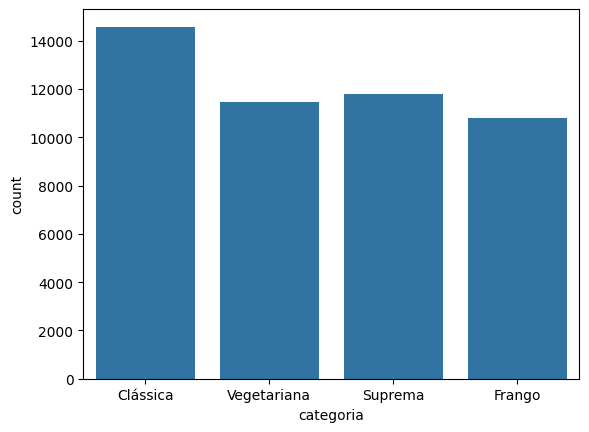

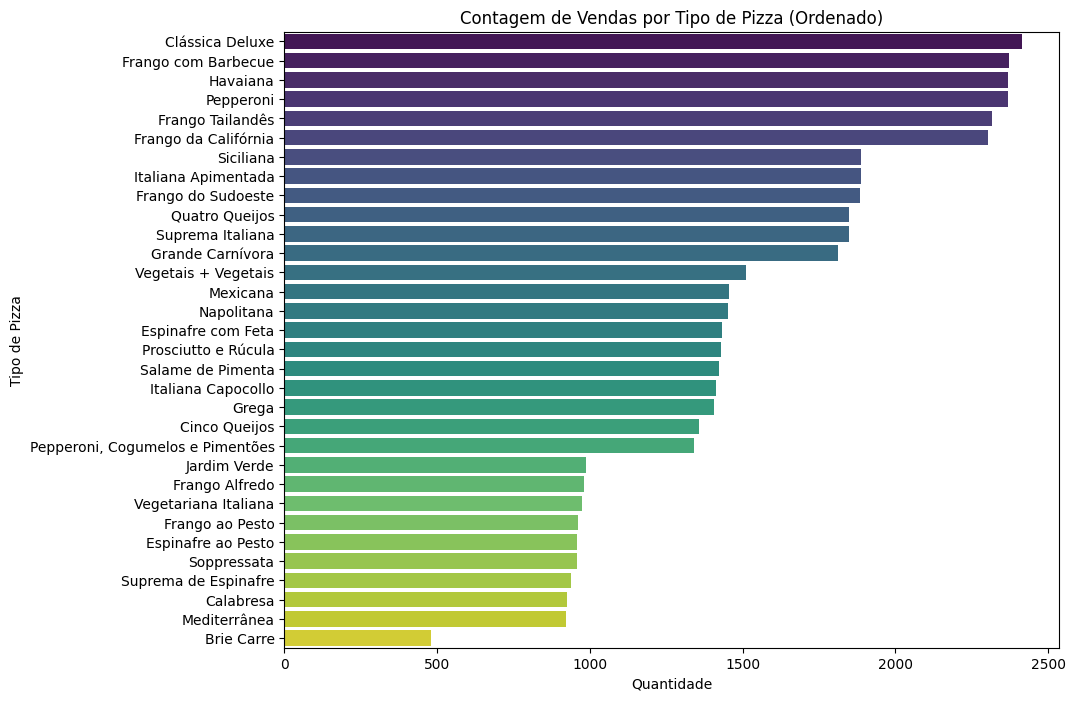

In [29]:
# Contagem total de categoria e pizzas
sns.countplot(df, x='categoria')
plt.show()

# Calcular a contagem de cada tipo de pizza
contagem_pizzas = df['pizza'].value_counts()

# Ordenar os valores da contagem de pizzas
contagem_pizzas = contagem_pizzas.sort_values(ascending=False)

# Plotar o gráfico de contagem de pizzas ordenado
plt.figure(figsize=(10, 8))
sns.barplot(x=contagem_pizzas.values, y=contagem_pizzas.index, palette='viridis')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Pizza')
plt.title('Contagem de Vendas por Tipo de Pizza (Ordenado)')
plt.show()

In [31]:
# Checar informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_venda            48620 non-null  int64         
 1   id_pedido           48620 non-null  int64         
 2   data                48620 non-null  datetime64[ns]
 3   hora                48620 non-null  datetime64[ns]
 4   quantidade          48620 non-null  int64         
 5   preco_unitario      48620 non-null  float64       
 6   preco_total         48620 non-null  float64       
 7   tamanho             48620 non-null  int64         
 8   categoria           48620 non-null  object        
 9   pizza               48620 non-null  object        
 10  ingredientes        48620 non-null  object        
 11  data_hora           48620 non-null  datetime64[ns]
 12  preco_total_pedido  48620 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int64(4), ob

In [34]:
# Extrair informações temporais de data e hora
df['dia_semana'] = df['data'].dt.weekday
df['dia'] = df['data'].dt.day
df['mes'] = df['data'].dt.month
df['semana'] = df['data'].dt.isocalendar().week
df['trimestre'] = df['data'].dt.quarter
df['horas'] = df['hora'].dt.hour
df['minuto'] = df['hora'].dt.minute

df['dia_semana'] = df['dia_semana'].map(
    {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta',
    4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
)
df['semana'] = df['semana'].astype(int)

In [35]:
df.head()

id_venda  id_pedido       data                hora  quantidade  \
0         1          1 2015-01-01 2024-04-06 11:38:36           1   
1         2          2 2015-01-01 2024-04-06 11:57:40           1   
2         3          2 2015-01-01 2024-04-06 11:57:40           1   
3         4          2 2015-01-01 2024-04-06 11:57:40           1   
4         5          2 2015-01-01 2024-04-06 11:57:40           1   

   preco_unitario  preco_total  tamanho    categoria             pizza  \
0           13.25        13.25        6     Clássica          Havaiana   
1           16.00        16.00        6     Clássica   Clássica Deluxe   
2           18.50        18.50        8  Vegetariana     Cinco Queijos   
3           20.75        20.75        8      Suprema  Suprema Italiana   
4           16.00        16.00        6  Vegetariana          Mexicana   

                                        ingredientes           data_hora  \
0      Presunto em Fatias, Abacaxi, Queijo Mussarela 2015-01-01 11:00:00   
1  Pepperoni, Cogumelos, Cebolas Vermelhas, Pimen... 2015-01-01 11:00:00   
2  Queijo Mussarela, Queijo Provolone, Queijo Gou... 2015-01-01 11:00:00   
3  Salame Calabrese, Capocollo, Tomates, Cebolas ... 2015-01-01 11:00:00   
4  Tomates, Pimentões Vermelhos, Pimentões Jalape... 2015-01-01 11:00:00   

   preco_total_pedido dia_semana  dia  mes  semana  trimestre  horas  minuto  
0               13.25     Quinta    1    1       1          1     11      38  
1               16.00     Quinta    1    1       1          1     11      57  
2               18.50     Quinta    1    1       1          1     11      57  
3               20.75     Quinta    1    1       1          1     11      57  
4               16.00     Quinta    1    1       1          1     11      57

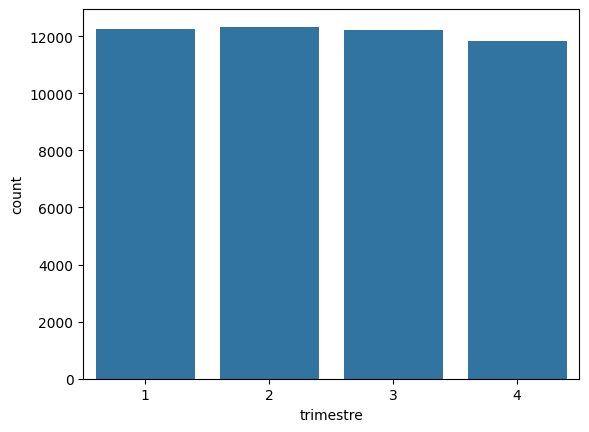

In [36]:
# Contagem por trimestre
sns.countplot(df, x='trimestre');

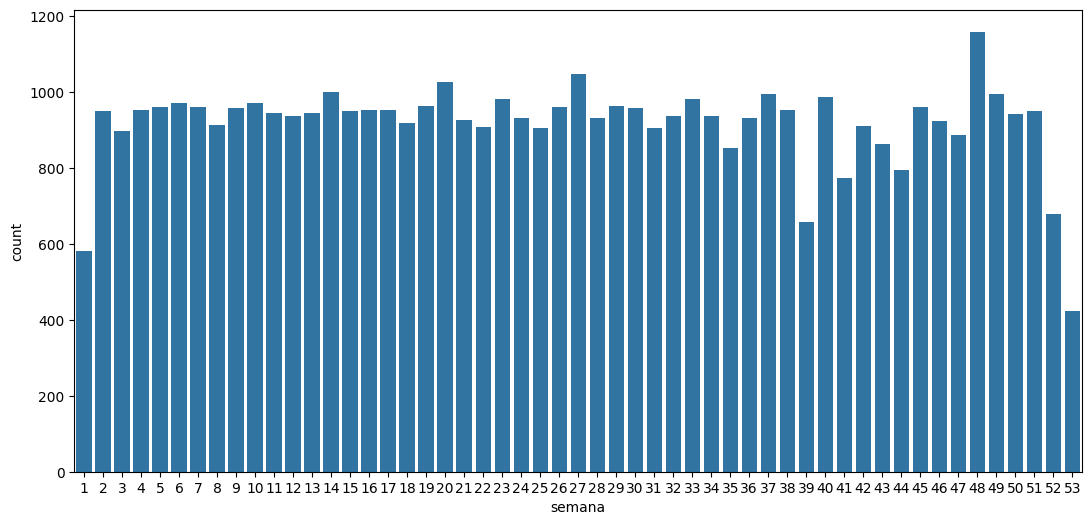

In [40]:
# Contagem por semana
plt.figure(figsize=(13, 6))
sns.countplot(df, x='semana');

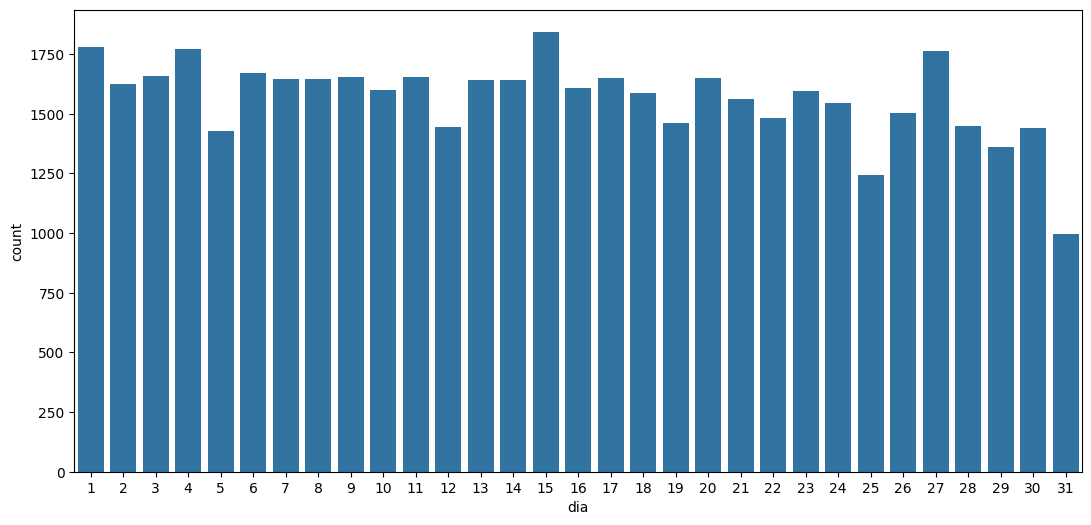

In [42]:
# Contagem por dia do mês
plt.figure(figsize=(13, 6))
sns.countplot(df, x='dia');

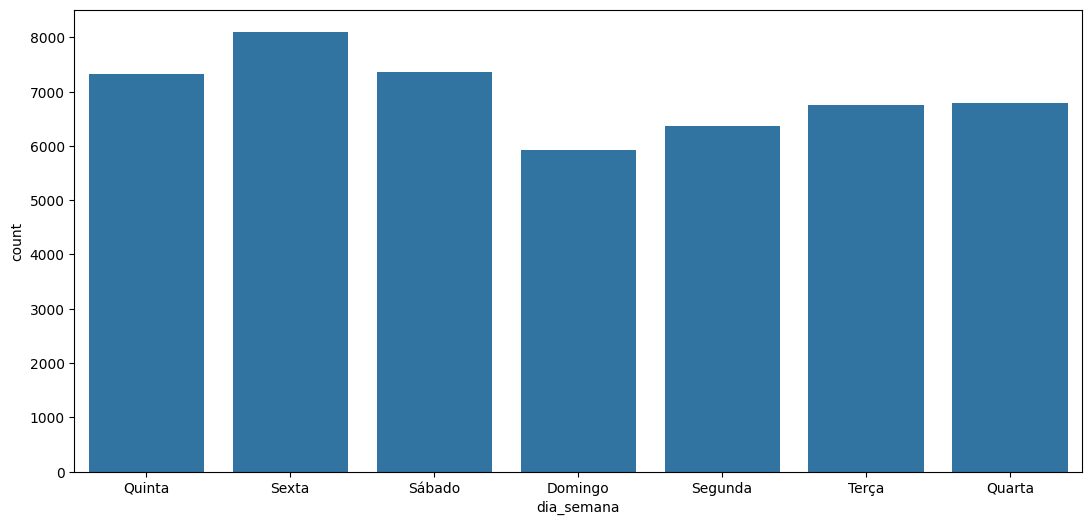

In [41]:
# Contagem por dia da semana
plt.figure(figsize=(13, 6))
sns.countplot(df, x='dia_semana');

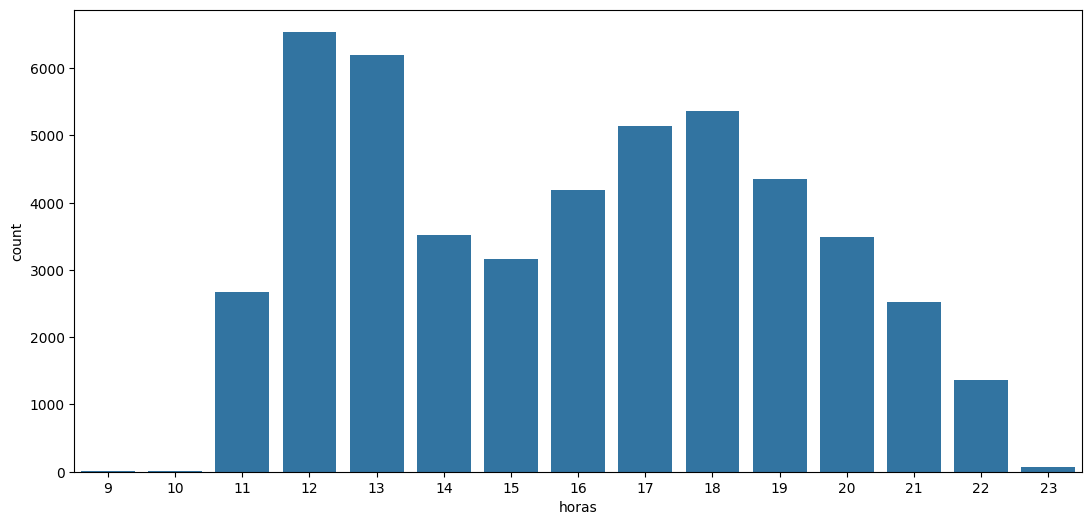

In [45]:
# Contagem por hora do dia
plt.figure(figsize=(13, 6))
sns.countplot(df, x='horas');

In [47]:
# Estatísticas descritivas básicas
pd.set_option('display.float_format', '{:.2f}'.format)
colunas = ['quantidade', 'preco_unitario', 'preco_total', 'tamanho', 'preco_total_pedido']
df[colunas].describe()

quantidade  preco_unitario  preco_total  tamanho  preco_total_pedido
count    48620.00        48620.00     48620.00 48620.00            48620.00
mean         1.02           16.49        16.82     6.25               17.50
std          0.14            3.62         4.44     1.76                8.59
min          1.00            9.75         9.75     4.00                9.75
25%          1.00           12.75        12.75     4.00               12.75
50%          1.00           16.50        16.50     6.00               16.50
75%          1.00           20.25        20.50     8.00               20.50
max          4.00           35.95        83.00    16.00              332.00

### Previsão de Demanda de Quantidade de Pizzas Vendidas por Hora

Neste projeto, embarcamos em uma jornada analítica para prever a demanda de pizzas vendidas por hora, visando ajudar proprietários de pizzarias e gestores do setor alimentício a otimizar seus processos de produção e estoque.

Começamos coletando e preparando um extenso conjunto de dados que continha informações detalhadas sobre as vendas de pizzas, incluindo data, hora e quantidade vendida por transação. Em seguida, realizamos uma análise exploratória para compreender melhor os padrões temporais e identificar possíveis sazonalidades nas vendas de pizza ao longo do dia.

Utilizamos técnicas avançadas de séries temporais para construir modelos de previsão capazes de antecipar a demanda futura com base nos dados históricos de vendas. Ajustamos modelos de previsão de séries temporais, como ARIMA (AutoRegressive Integrated Moving Average) e modelos de regressão, para capturar tendências e padrões sazonais nas vendas de pizza.

Após treinar nossos modelos de previsão, avaliamos sua precisão e desempenho usando métricas apropriadas, como erro médio absoluto (MAE) e erro médio quadrático (RMSE). Realizamos ajustes nos modelos e refinamos nossas previsões para garantir resultados confiáveis e úteis para tomada de decisão.

Por fim, apresentamos nossas previsões de demanda de quantidade de pizzas vendidas por hora, fornecendo insights valiosos para os gestores do setor alimentício. Essas previsões podem ser utilizadas para otimizar a programação de produção, gerenciamento de estoque e planejamento de recursos humanos, contribuindo para a eficiência operacional e maximização dos lucros.

Ao final deste projeto, esperamos ter fornecido uma solução eficaz e prática para a previsão da demanda de pizzas vendidas por hora, ajudando os profissionais do setor alimentício a enfrentar os desafios de gerenciamento de demanda e aprimorar suas operações comerciais.

Correlações com a coluna 'quantidade':
quantidade            1.00
preco_total_pedido    0.87
preco_total           0.54
minuto                0.01
tamanho               0.01
preco_unitario        0.01
trimestre             0.00
semana                0.00
mes                   0.00
id_venda              0.00
id_pedido             0.00
dia                   0.00
horas                -0.06
Name: quantidade, dtype: float64


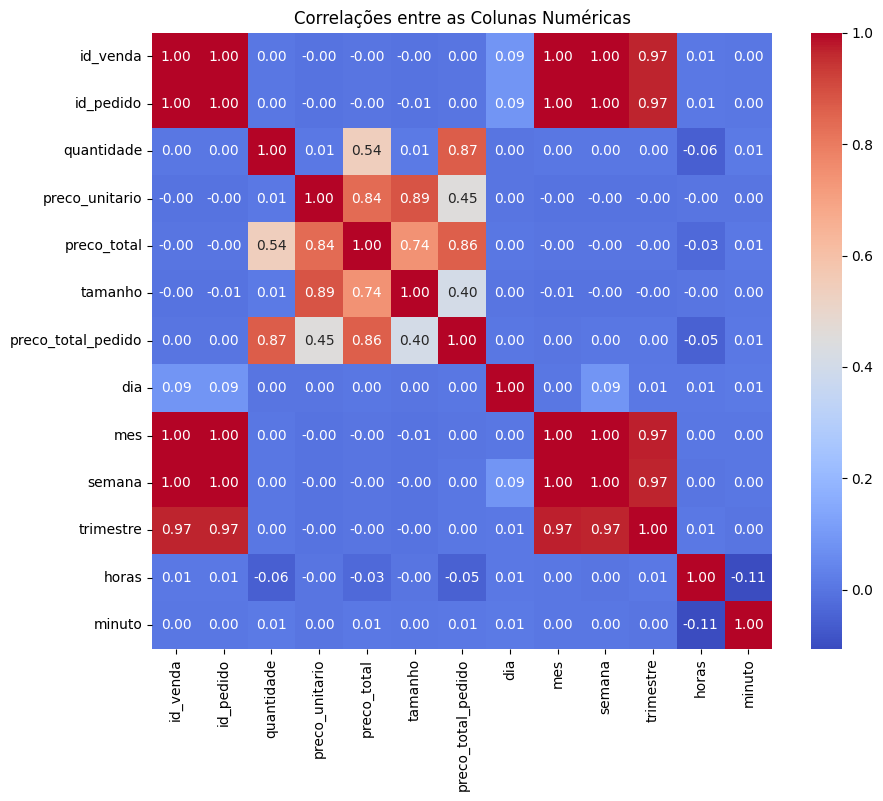

In [52]:
# Checar correlações entre quantidade e demais variáveis numéricas

# Calcular as correlações
correlacoes = df.corr(numeric_only=True)['quantidade'].sort_values(ascending=False)

# Imprimir as correlações em texto
print("Correlações com a coluna 'quantidade':")
print(correlacoes)

# Plotar o heatmap das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlações entre as Colunas Numéricas')
plt.show()

In [53]:
# Selecionar colunas relevantes
print(df.columns)

df = df[['quantidade', 'pizza','horas', 'dia_semana', 'dia', 'mes', 'semana', 'trimestre']]
df.head()

Index(['id_venda', 'id_pedido', 'data', 'hora', 'quantidade', 'preco_unitario',
       'preco_total', 'tamanho', 'categoria', 'pizza', 'ingredientes',
       'data_hora', 'preco_total_pedido', 'dia_semana', 'dia', 'mes', 'semana',
       'trimestre', 'horas', 'minuto'],
      dtype='object')


quantidade             pizza  horas dia_semana  dia  mes  semana  trimestre
0           1          Havaiana     11     Quinta    1    1       1          1
1           1   Clássica Deluxe     11     Quinta    1    1       1          1
2           1     Cinco Queijos     11     Quinta    1    1       1          1
3           1  Suprema Italiana     11     Quinta    1    1       1          1
4           1          Mexicana     11     Quinta    1    1       1          1

In [58]:
# Agrupar os dados por hora e somar quantidades
df = df.groupby(['trimestre', 'mes', 'semana', 'dia', 'dia_semana', 'horas'])
df = df[['quantidade']].sum().reset_index()
df

trimestre  mes  semana  dia dia_semana  horas  quantidade
0             1    1       1    1     Quinta     11           6
1             1    1       1    1     Quinta     12          17
2             1    1       1    1     Quinta     13          33
3             1    1       1    1     Quinta     14          15
4             1    1       1    1     Quinta     15          14
...         ...  ...     ...  ...        ...    ...         ...
4176          4   12      53   31     Quinta     19          23
4177          4   12      53   31     Quinta     20          17
4178          4   12      53   31     Quinta     21           7
4179          4   12      53   31     Quinta     22           1
4180          4   12      53   31     Quinta     23           1

[4181 rows x 7 columns]

In [59]:
# Converter dias da semana para representações numéricas (0 = seg, 6 = dom)
df['dia_semana'] = df['dia_semana'].map(
    {'Segunda': 0, 'Terça': 1, 'Quarta': 2, 'Quinta': 3, 'Sexta': 4, 'Sábado': 5, 'Domingo': 6}
)

In [60]:
# Separar as variáveis preditivas da variável alvo (quantidade)
X = df.drop('quantidade', axis=1)
y = df['quantidade']

In [61]:
# Dividir a base de dados em conjuntos para treino e validação do modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3344, 6) (837, 6) (3344,) (837,)


Utilizaremos 80% dos dados para treinamento do modelo e 20% para testar a performance.

In [62]:
# Criar e treinar o modelo
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0, n_estimators=50)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [63]:
# Realizar previsões no conjunto de validação
y_pred = model.predict(X_test)

In [65]:
# Retirar média da base de treino
media = y_train.mean()
medias = [media] * len(y_test)
print(f'Média da qtd. de pizzas vendidas por hora (base de treino): {media}')

Média da qtd. de pizzas vendidas por hora (base de treino): 11.955442583732058


Utilizaremos as seguintes métricas de avaliação de performance:
- MAE (Erro Médio Absoluto)
- MAPE (Erro Médio Percentual Absoluto)
- R² Score

**1. Mean Absolute Error (MAE):**

O MAE é uma métrica que calcula a média das diferenças absolutas entre as previsões do modelo e os valores reais. 

**Fácil interpretação:** O MAE representa uma média das diferenças absolutas entre as previsões e os valores reais, o que é intuitivamente compreensível.

**Robustez a outliers:** Como as diferenças são tomadas de forma absoluta, o MAE não é sensível a outliers extremos.


**2. Mean Absolute Percentage Error (MAPE)**

O MAPE é uma métrica que calcula a média das diferenças percentuais absolutas entre as previsões do modelo e os valores reais. É útil para entender o erro relativo em relação aos valores reais.

**Interpretável em termos percentuais:** O MAPE fornece uma medida de erro relativo em relação aos valores reais, facilitando a interpretação do desempenho do modelo em termos percentuais.

**Comparação entre diferentes conjuntos de dados:** Como o erro é expresso em termos percentuais, é útil para comparar o desempenho do modelo em diferentes conjuntos de dados com escalas diferentes.

**3. Coeficiente de Determinação (R2 Score)**

O R2 Score, também conhecido como coeficiente de determinação, é uma métrica que indica a proporção da variância dos valores dependentes que é explicada pela regressão linear. Em outras palavras, ele mede a proporção da variabilidade na variável de resposta que é explicada pelo modelo.

**Interpretável:** O R2 Score fornece uma medida de quão bem o modelo se ajusta aos dados, variando de 0 a 1, onde 1 indica um ajuste perfeito e 0 indica que o modelo não explica nada da variabilidade dos dados.

**Comparação com um modelo de referência:** É útil para comparar o desempenho do modelo com um modelo de referência simples, como uma linha horizontal que representa a média dos valores reais. Um R2 Score mais alto indica que o modelo é mais capaz de explicar a variabilidade dos dados do que o modelo de referência.

Em resumo, cada uma dessas métricas possui suas vantagens na avaliação da performance de um modelo de previsão de demanda de quantidade de pizzas vendidas por hora. O MAE e o MAPE são úteis para entender o erro absoluto e relativo entre as previsões e os valores reais, enquanto o R2 Score fornece uma medida do quão bem o modelo se ajusta aos dados, em termos de variabilidade explicada. Utilizar uma combinação dessas métricas pode fornecer uma avaliação mais abrangente e informativa do desempenho do modelo.

In [66]:
# Avaliar a performance das médias em dados "não-vistos" com diferentes métricas
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

mae_mean = mean_absolute_error(y_test, medias)
mape_mean = mean_absolute_percentage_error(y_test, medias)
r2_mean = r2_score(y_test, medias)

print(f'MAE Média: {mae_mean}')
print(f'MAPE Média: {mape_mean}')
print(f'R2 Média: {r2_mean}')

MAE Média: 5.937192739505982
MAPE Média: 1.2616420476579129
R2 Média: -0.004499021940532533


In [67]:
# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)
r2_model = r2_score(y_test, y_pred)

print(f'MAE Modelo: {mae_model}')
print(f'MAPE Modelo: {mape_model}')
print(f'R2 Modelo: {r2_model}')

MAE Modelo: 5.031111111111111
MAPE Modelo: 0.8374508245521253
R2 Modelo: 0.18425716373334566


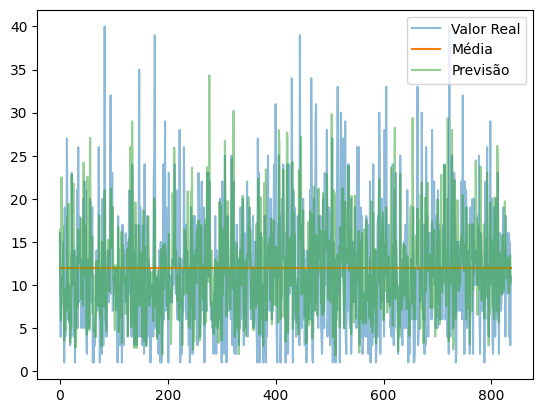

In [70]:
# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=0.5)
plt.plot(np.arange(len(y_test)), medias, label='Média', alpha=1)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=0.5)
plt.legend();

In [71]:
# Ajuste e tunagem de hiperparâmetros do modelo para melhorar a performance
from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros que gostaríamos de sintonizar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

# Avaliando o modelo nos dados de teste
test_score = best_rf.score(X_test, y_test)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Desempenho do modelo nos dados de teste:", test_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Desempenho do modelo nos dados de teste: 0.3046197843174371


In [72]:
# Definindo os hiperparâmetros que gostaríamos de sintonizar
param_grid = {
    'n_estimators': [300, 400, 500],
}

# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42, min_samples_leaf=4, min_samples_split=10, max_depth=10)

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

# Avaliando o modelo nos dados de teste
test_score = best_rf.score(X_test, y_test)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Desempenho do modelo nos dados de teste:", test_score)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros encontrados: {'n_estimators': 300}
Desempenho do modelo nos dados de teste: 0.3046197843174371


- MAE Média: 5.937192739505982
- MAE Modelo: 5.031111111111111

- MAPE Média: 1.2616420476579129
- MAPE Modelo: 0.8374508245521253

- R2 Média: -0.004499021940532533
- R2 Modelo: 0.18425716373334566

MAE Modelo: 4.696427433599541
MAPE Modelo: 0.7842515958041641
R2 Modelo: 0.30339413261422876


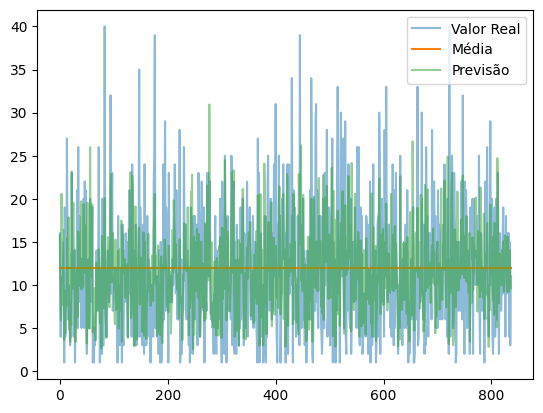

In [73]:
# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                              min_samples_split=10, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)
r2_model = r2_score(y_test, y_pred)

print(f'MAE Modelo: {mae_model}')
print(f'MAPE Modelo: {mape_model}')
print(f'R2 Modelo: {r2_model}')

# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=0.5)
plt.plot(np.arange(len(y_test)), medias, label='Média', alpha=1)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=0.5)
plt.legend();

In [84]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão de treino/teste
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                                  min_samples_split=10, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.696427433599541 0.7842515958041641 0.30339413261422876
1 4.986856589683025 0.7080192752540814 0.2688236545200555
2 4.837148559742838 0.7050284090129898 0.3123056689751287
3 4.860317847816018 0.7601812880203751 0.30747996757347984
4 5.016759111530567 0.7417201400977181 0.3219746603644925
5 4.82974971784588 0.7572548639464531 0.26711106575757626
6 4.93222759963225 0.7528550147588375 0.2943921881056607
7 5.261279043353336 0.8096307983697277 0.28047234732189275
8 5.095719553434803 0.8259919713271553 0.20534949534432712
9 5.064715113926254 0.8228807198563024 0.26656692301314977
10 5.11379019767697 0.7529943171603031 0.26101670438796676
11 4.8540916988675695 0.7660552410044933 0.2900770259576285
12 4.877137536919778 0.7351026036237911 0.30428121200978475
13 4.811217365630584 0.772970635047408 0.3184981005939136
14 5.23622673557894 0.802651306111283 0.2980047053945716
15 5.022608718578147 0.7615792518113372 0.2779523086297704
16 5.026435874868556 0.7199890538411673 0.3108997019975309
17 4

In [74]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão do modelo
for x in range(101):
    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=x, n_estimators=300, min_samples_leaf=4, 
                                  min_samples_split=10, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.696427433599541 0.7842515958041641 0.30339413261422876
1 4.717750596916709 0.7855469867762486 0.30144598744031303
2 4.695521563206421 0.7848396430488132 0.30605094815085077
3 4.705184304760873 0.784476525869226 0.3018106429107642
4 4.69959245921875 0.7846763868341616 0.30719446052510424
5 4.692925781198699 0.7827235120968024 0.3072701776861996
6 4.710843101680623 0.7884349692324375 0.3021646613554818
7 4.696242047520021 0.783745897545389 0.3064639021218081
8 4.709835192927134 0.7870679802872922 0.30050786463642487
9 4.706993658161434 0.7857011943661644 0.30450729312889824
10 4.704621765879621 0.7859838193063602 0.3036806068214999
11 4.718880342880114 0.7881867079066501 0.29959409735884346
12 4.700981528441687 0.7857107873114266 0.30366935349314395
13 4.7014953105140185 0.7849041482540662 0.30465687817024023
14 4.695911124888118 0.7839052241909101 0.30666890592165874
15 4.711065979976486 0.7846726065632 0.30140163629028527
16 4.712443450102636 0.7863794566736135 0.3015653791128047
1

Não houve grande variação na performance, o modelo atingiu o "plateau" nesses dados.

Ajustes futuros caso necessário:

- Remoção de Outliers (valores discrepantes)
- Préprocessar/Escalonar/Normalizar/OHE nos dados
- Engenharia de Atributos (novos dados com base nos atuais)

In [75]:
df.head()

trimestre  mes  semana  dia  dia_semana  horas  quantidade
0          1    1       1    1           3     11           6
1          1    1       1    1           3     12          17
2          1    1       1    1           3     13          33
3          1    1       1    1           3     14          15
4          1    1       1    1           3     15          14

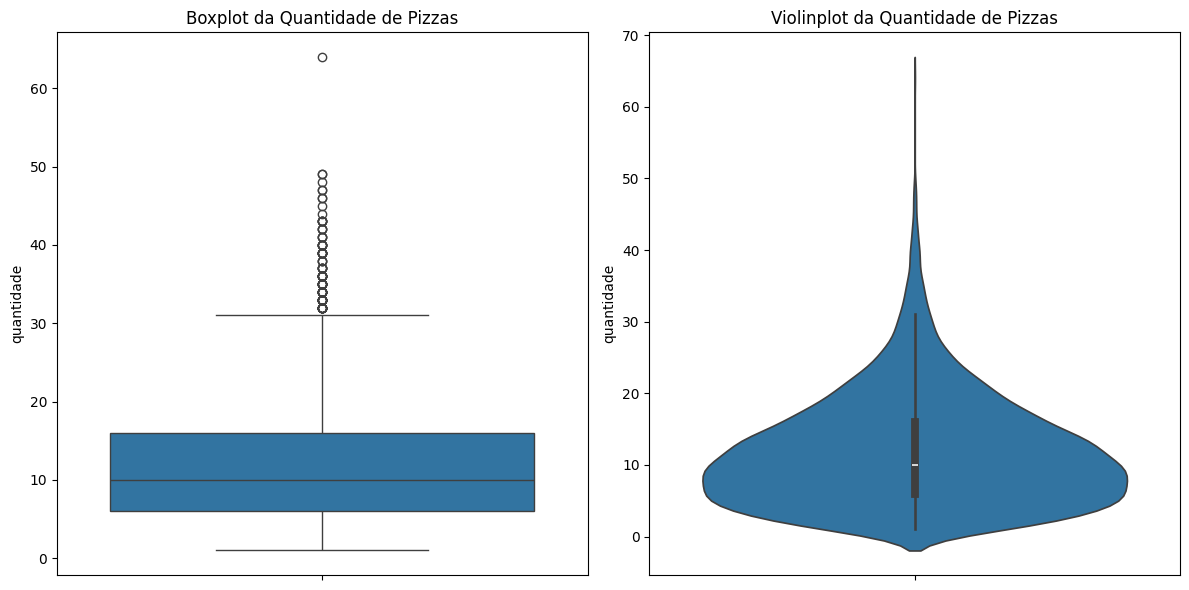

In [79]:
# Detecção de outliers
# Criar uma figura e os eixos para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
sns.boxplot(data=df, y='quantidade', ax=axs[0])
axs[0].set_title('Boxplot da Quantidade de Pizzas')

# Violinplot
sns.violinplot(data=df, y='quantidade', ax=axs[1])
axs[1].set_title('Violinplot da Quantidade de Pizzas')

# Ajustar o layout
plt.tight_layout()

# Mostrar os subplots
plt.show()

**Abordagem 1: Z-Score**

O Z-Score é uma medida estatística que indica o quão longe um ponto de dados está da média em termos de desvios padrão. Geralmente, consideramos pontos de dados com um Z-Score acima de 3 (ou abaixo de -3) como outliers.

**Abordagem 2: Intervalo Interquartil (IQR)**

O intervalo interquartil é uma medida estatística que calcula a diferença entre o primeiro quartil (Q1) e o terceiro quartil (Q3). Geralmente, consideramos pontos de dados abaixo de Q1 - 1,5 * IQR ou acima de Q3 + 1,5 * IQR como outliers.

**Abordagem 3: Visualização Boxplot**
O boxplot é uma visualização gráfica que mostra a distribuição dos dados e identifica os valores discrepantes (outliers).

In [80]:
from scipy import stats

# Calcular o Z-Score para a coluna 'quantidade'
z_scores = stats.zscore(df['quantidade'])

# Identificar outliers com Z-Score acima de 3 ou abaixo de -3
outliers_zscore = df[(z_scores > 3) | (z_scores < -3)]

print("Outliers detectados usando Z-Score:")
print(outliers_zscore)

Outliers detectados usando Z-Score:
      trimestre  mes  semana  dia  dia_semana  horas  quantidade
19            1    1       1    2           4     18          36
84            1    1       2    8           3     12          49
209           1    1       4   19           0     12          43
221           1    1       4   20           1     12          43
326           1    1       5   29           3     13          39
384           1    2       6    3           1     12          47
420           1    2       6    6           4     13          37
583           1    2       8   20           4     13          38
644           1    2       9   25           2     12          37
655           1    2       9   26           3     13          38
714           1    3      10    3           1     13          36
736           1    3      10    5           3     13          39
746           1    3      10    6           4     12          40
1037          1    3      14   31           1     13  

In [81]:
# Calcular o intervalo interquartil (IQR)
Q1 = df['quantidade'].quantile(0.25)
Q3 = df['quantidade'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando o IQR
outliers_iqr = df[(df['quantidade'] < Q1 - 1.5 * IQR) | (df['quantidade'] > Q3 + 1.5 * IQR)]

print("Outliers detectados usando IQR:")
print(outliers_iqr)

Outliers detectados usando IQR:
      trimestre  mes  semana  dia  dia_semana  horas  quantidade
2             1    1       1    1           3     13          33
13            1    1       1    2           4     12          32
19            1    1       1    2           4     18          36
84            1    1       2    8           3     12          49
151           1    1       3   14           2     12          34
...         ...  ...     ...  ...         ...    ...         ...
4009          4   12      51   16           2     13          33
4037          4   12      51   18           4     18          32
4057          4   12      51   20           6     13          40
4136          4   12      53   28           0     12          36
4149          4   12      53   29           1     13          33

[98 rows x 7 columns]


In [83]:
# Remover outliers (36 ou mais)
df = df.loc[df['quantidade'] <= 35]
df.shape

(4129, 7)

- MAE Modelo: 4.696427433599541
- MAPE Modelo: 0.7842515958041641
- R2 Modelo: 0.30339413261422876

MAE Modelo: 4.933904628966974
MAPE Modelo: 0.8431398397132617
R2 Modelo: 0.23383317583829355


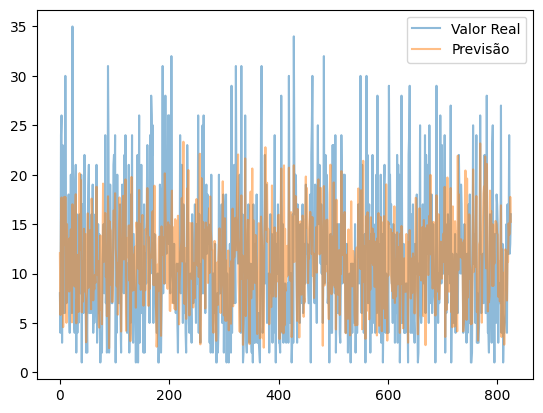

In [86]:
X = df.drop('quantidade', axis=1)
y = df['quantidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                              min_samples_split=10, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)
r2_model = r2_score(y_test, y_pred)

print(f'MAE Modelo: {mae_model}')
print(f'MAPE Modelo: {mape_model}')
print(f'R2 Modelo: {r2_model}')

# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=0.5)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=0.5)
plt.legend();

In [87]:
# Ajuste e tunagem de hiperparâmetros do modelo para melhorar a performance
from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros que gostaríamos de sintonizar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

# Avaliando o modelo nos dados de teste
test_score = best_rf.score(X_test, y_test)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Desempenho do modelo nos dados de teste:", test_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Desempenho do modelo nos dados de teste: 0.2298059790138589


In [88]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão de treino/teste
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                                  min_samples_split=10, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.933904628966974 0.8431398397132617 0.23383317583829355
1 4.830479643729925 0.6793876574096307 0.24516007222142433
2 4.760641233251215 0.7326978892690229 0.27809625403775395
3 4.955420735757988 0.7828904265250688 0.25761402163360403
4 4.620597683169491 0.7793286887399556 0.25786140504290256
5 4.930490292688042 0.7787495334017024 0.27903621341386176
6 4.869143583433105 0.7050169622508877 0.2611453447475829
7 4.765110553557504 0.7517532940108638 0.2758275454919068
8 4.548767909493937 0.6552338601550838 0.2839289247489337
9 4.933696173288352 0.8030788686535528 0.21559243806192607
10 4.819948334687458 0.8204831518094899 0.2863703514232512
11 4.85209662028169 0.7821335144479705 0.26611208167525624
12 4.893372149793256 0.7842867953895148 0.23518795964039196
13 4.847110040612151 0.8016140557638868 0.2906276514008903
14 4.462746091693319 0.6777815259554479 0.251316952373164
15 4.536403543637066 0.7445286345209234 0.2777030539148968
16 4.810399361095445 0.7924676062980767 0.2804534698757918


MAE Modelo: 4.462746091693319
MAPE Modelo: 0.6777815259554479


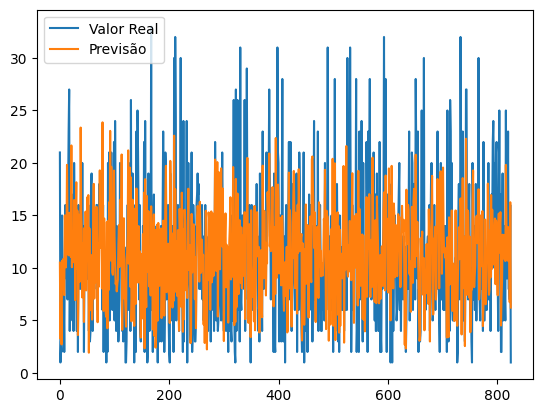

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size=0.2)

# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                              min_samples_split=10, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE Modelo: {mae_model}')
print(f'MAPE Modelo: {mape_model}')

# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=1)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=1)
plt.legend();

In [94]:
# Encontrar as melhores variáveis para o modelo

# Extrair a importância das features
importancias = model.feature_importances_

# Criar um DataFrame com as importâncias das features
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importância': importancias})

# Ordenar as features pela importância
importancias_df = importancias_df.sort_values(by='Importância', ascending=False)

# Exibir as melhores variáveis
print("Melhores variáveis para o modelo RandomForestRegressor:")
print(importancias_df)

Melhores variáveis para o modelo RandomForestRegressor:
      Feature  Importância
5       horas         0.52
4  dia_semana         0.18
3         dia         0.14
2      semana         0.12
1         mes         0.03
0   trimestre         0.01


In [95]:
# Remover variáveis com pouca importância para o modelo
df.drop(['mes', 'trimestre'], axis=1, inplace=True)

In [96]:
df.head()

semana  dia  dia_semana  horas  quantidade
0       1    1           3     11           6
1       1    1           3     12          17
2       1    1           3     13          33
3       1    1           3     14          15
4       1    1           3     15          14

MAE Modelo: 4.463512847251722
MAPE Modelo: 0.6775700073326069


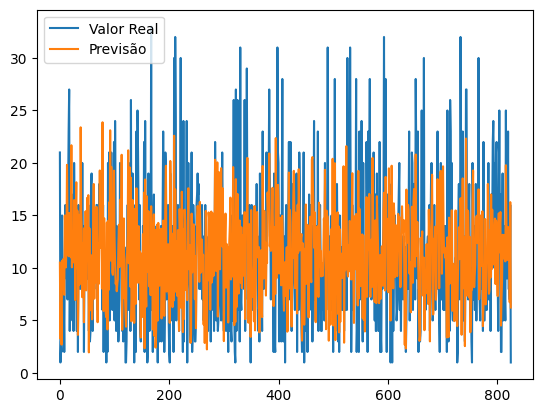

In [98]:
X = df.drop('quantidade', axis=1)
y = df['quantidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size=0.2)

# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                              min_samples_split=10, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE Modelo: {mae_model}')
print(f'MAPE Modelo: {mape_model}')

# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=1)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=1)
plt.legend();

In [99]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão de treino/teste
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                                  min_samples_split=10, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.933324086755492 0.8431725301016347 0.23384150279411642
1 4.828944396550863 0.6792489041618217 0.24606864868241374
2 4.7599914855166 0.7319003947597537 0.2781831253166849
3 4.956412931049722 0.7828273661683675 0.2574038752451885
4 4.6196195474877175 0.7789068024019775 0.2577585187446212
5 4.929680455809618 0.778604151054264 0.2793044902711286
6 4.86778306534222 0.7045495466494327 0.2612108726409119
7 4.762855842268671 0.7513404198295893 0.2763633926123853
8 4.549610164378796 0.6558419036882523 0.28416952485900815
9 4.932214304585133 0.8027536452578943 0.21593251066263386
10 4.819658211920759 0.8212734406104077 0.28594280306808895
11 4.850663392120978 0.7817560207607177 0.2664102209790449
12 4.891206837603604 0.7830900620521672 0.23573259086101195
13 4.846647413109653 0.8014653311678684 0.29059615764663294
14 4.463512847251722 0.6775700073326069 0.2512593512012141
15 4.535089855988175 0.7448522609334802 0.27797541251181535
16 4.810288150581968 0.7925513785042579 0.2807686024460845
17

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size=0.2)

# Definindo os hiperparâmetros que gostaríamos de sintonizar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

# Avaliando o modelo nos dados de teste
test_score = best_rf.score(X_test, y_test)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Desempenho do modelo nos dados de teste:", test_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Desempenho do modelo nos dados de teste: 0.2470986336234544


MAE Modelo: 4.463512847251722
MAPE Modelo: 0.6775700073326069


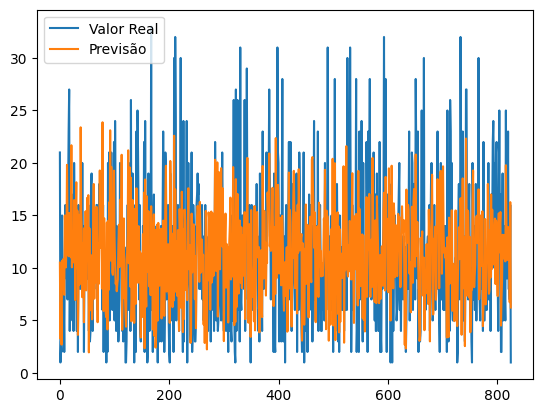

In [101]:
X = df.drop('quantidade', axis=1)
y = df['quantidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size=0.2)

# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                              min_samples_split=10, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE Modelo: {mae_model}')
print(f'MAPE Modelo: {mape_model}')

# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=1)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=1)
plt.legend();

In [102]:
df.head()

semana  dia  dia_semana  horas  quantidade
0       1    1           3     11           6
1       1    1           3     12          17
2       1    1           3     13          33
3       1    1           3     14          15
4       1    1           3     15          14

In [103]:
df.groupby('horas')[['quantidade']].sum()

quantidade
horas            
9               4
10             18
11           2728
12           5658
13           5677
14           3613
15           3216
16           4239
17           5130
18           5270
19           4364
20           3534
21           2545
22           1386
23             68

In [104]:
# Remover horas outliers (9, 10, 23)
df = df.loc[df['horas'] != 9]
df = df.loc[df['horas'] != 10]
df = df.loc[df['horas'] != 23]
df.shape

(4094, 5)

In [105]:
df.groupby('dia_semana')[['quantidade']].sum()

quantidade
dia_semana            
0                 6110
1                 6646
2                 6781
3                 6779
4                 7672
5                 7383
6                 5989

In [106]:
# 1 para dia_semana = 4 ou 5 (sexta ou sábado) e 0 para demais dias
# Criar a nova coluna "dia_pico" com base na condição especificada
df['dia_pico'] = df['dia_semana'].apply(lambda x: 1 if x in [4, 5] else 0)

In [107]:
# "hora_pico" com 2 para hora = 12, 13, 17 ou 18; 1 para hora = 14, 15, 19 ou 20 e 0 para as demais

# Lista de horas consideradas como pico
horas_pico_2 = [12, 13, 17, 18]
horas_pico_1 = [14, 15, 19, 20]

# Função para atribuir valores à nova coluna com base na hora
def atribuir_valor(hora):
    if hora in horas_pico_2:
        return 2
    elif hora in horas_pico_1:
        return 1
    else:
        return 0

# Criar a nova coluna "hora_pico" com base na condição especificada
df['hora_pico'] = df['horas'].apply(atribuir_valor)

In [108]:
df.head()

semana  dia  dia_semana  horas  quantidade  dia_pico  hora_pico
0       1    1           3     11           6         0          0
1       1    1           3     12          17         0          2
2       1    1           3     13          33         0          2
3       1    1           3     14          15         0          1
4       1    1           3     15          14         0          1

MAE Modelo: 4.667365853452154
MAPE Modelo: 0.854480815290271


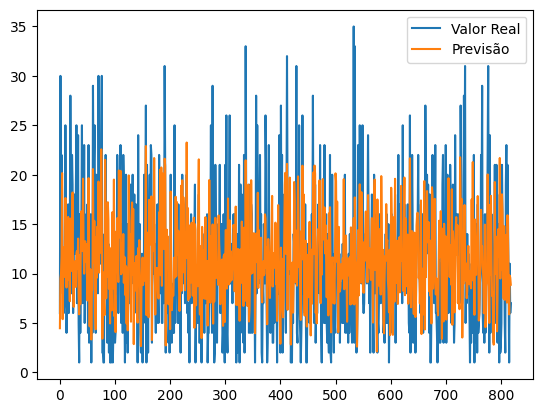

In [109]:
X = df.drop('quantidade', axis=1)
y = df['quantidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size=0.2)

# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                              min_samples_split=10, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE Modelo: {mae_model}')
print(f'MAPE Modelo: {mape_model}')

# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=1)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=1)
plt.legend();

In [110]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão de treino/teste
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=0, n_estimators=300, min_samples_leaf=4, 
                                  min_samples_split=10, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.853180100064876 0.7648956830647401 0.21592663704270343
1 4.620160907647249 0.7171703096994798 0.30238431174508484
2 4.782357487356142 0.6840461960006737 0.28187178642033894
3 4.900935606032827 0.7617376111633702 0.23359514986196994
4 4.685542448809243 0.7991374967749786 0.2668660043029255
5 4.879684613244206 0.7127625262694637 0.2546688271833667
6 4.8959748455766166 0.8013467445385187 0.27588717511984295
7 4.808272026112922 0.7756584084310665 0.28227744990723613
8 4.660737887982036 0.7171408891437946 0.2551586613817901
9 4.7528472142960565 0.6700002586599384 0.2792806879891647
10 4.882055659987442 0.7295880441148432 0.2380146509795129
11 4.809877810871126 0.7723638445219909 0.257786064797464
12 4.8627451531723205 0.726736658568209 0.2686619828649136
13 4.728152537415341 0.7054055299716349 0.22051681031672032
14 4.667365853452154 0.854480815290271 0.26881198328527955
15 5.090497512718426 0.8192037779926225 0.2366376131945911
16 4.8380932130485395 0.7880485805989642 0.223337890248215

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size=0.2)

# Definindo os hiperparâmetros que gostaríamos de sintonizar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

# Avaliando o modelo nos dados de teste
test_score = best_rf.score(X_test, y_test)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Desempenho do modelo nos dados de teste:", test_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Desempenho do modelo nos dados de teste: 0.26294896400916423


In [112]:
# Definindo os hiperparâmetros que gostaríamos de sintonizar
param_grid = {
    'n_estimators': [150, 175, 200, 225],
    'max_depth': [8, 10, 12],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [4, 5, 6]
}

# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

# Avaliando o modelo nos dados de teste
test_score = best_rf.score(X_test, y_test)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Desempenho do modelo nos dados de teste:", test_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores hiperparâmetros encontrados: {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 200}
Desempenho do modelo nos dados de teste: 0.2828578307227386


In [113]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão de treino/teste
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=0, n_estimators=200, min_samples_leaf=6, 
                                  min_samples_split=8, max_depth=8)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.794722350915415 0.7578336240656258 0.23762037615156162
1 4.560100504479704 0.7143453228294474 0.32488481331561725
2 4.747045258991163 0.6836453504451606 0.29350707383436436
3 4.811845193141866 0.7527855598347092 0.2558065495745535
4 4.606634765791028 0.7901700244664387 0.29070207854290553
5 4.8100524405114475 0.710636643458985 0.27611695948219916
6 4.838010403184417 0.7933336383801235 0.2953021899412117
7 4.734592328343045 0.7683668103299243 0.3018616965520242
8 4.615947451448938 0.7146732344564072 0.2703827738678054
9 4.6803707531212755 0.6638872217894898 0.3025861654997538
10 4.816461764430528 0.723255515717353 0.25670201799333514
11 4.715391202276792 0.7631490611108758 0.2805758972931145
12 4.795736199345541 0.721580931237918 0.28736486485823887
13 4.673443945554531 0.7002757336639982 0.24095953309542162
14 4.626274987663443 0.8515955440488162 0.2821873884297048
15 5.058714287646896 0.8170348497027818 0.2526953182757662
16 4.778088495260491 0.7860796619712214 0.24518207992925956

In [114]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão de treino/teste
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=x, n_estimators=200, min_samples_leaf=6, 
                                    min_samples_split=8, max_depth=8)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.453632342381665 0.6653941744454747 0.280152307017022
1 4.446457871277186 0.6623295874919761 0.28036685541999173
2 4.455246736716892 0.66432572449145 0.2796092063399509
3 4.452172942060514 0.6635542190241837 0.2809178751411324
4 4.455572813115152 0.6628660852290766 0.280897719932266
5 4.44442902252782 0.6617239452843332 0.28195033044007733
6 4.4493766592635 0.6636559609447221 0.28012575810587936
7 4.449338213661284 0.6639959892900933 0.27952947784275506
8 4.451262349383353 0.6645551432686617 0.27857933497639
9 4.450880150926915 0.6655336717098889 0.2780390800785246
10 4.449757584077251 0.6647655895334331 0.28014414878355864
11 4.454923561222311 0.6631318324378731 0.2785356385474379
12 4.443835169355539 0.6630198531302623 0.28095151675022667
13 4.446022912676549 0.6617640279063437 0.2824520357669009
14 4.45356742257968 0.6630975278910411 0.27780561892873257
15 4.449085926841039 0.66403086344972 0.28068888503026346
16 4.449981965640934 0.6630041979859806 0.28073942136040386
17 4.44541

In [115]:
# Realizar "validação-cruzada manual" para encontrar a melhor divisão de treino/teste
for x in range(150, 251):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=100, n_estimators=x, min_samples_leaf=6, 
                                    min_samples_split=8, max_depth=8)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

150 4.447514755774699 0.6619400701920445 0.28055633616355613
151 4.446397760026588 0.6618921199938579 0.2807577982957966
152 4.4468961657880275 0.6619519566922103 0.2806822909909006
153 4.447433686167774 0.6621189808851264 0.2806911426978117
154 4.447096993884628 0.6623075231055016 0.2809624349827837
155 4.446568537419048 0.6622828576839904 0.2810567596581286
156 4.447257785500996 0.6623401995734806 0.2810514622784517
157 4.447518038451299 0.6624331292277336 0.28101880637192844
158 4.448019673645248 0.6625717269612851 0.2807466506845957
159 4.447331546130235 0.6624499727391165 0.2808886278606373
160 4.448108777646615 0.6626098508089949 0.2807413060311673
161 4.44947254654824 0.6628320638262007 0.2804769441357683
162 4.448431329473901 0.6627126745923972 0.2806397003894786
163 4.448524670087323 0.6627536652782605 0.28059860963838856
164 4.448746158012304 0.6627281438747339 0.2807087420997293
165 4.448888701695428 0.6629572607911352 0.2806708710026914
166 4.448788636268348 0.6628625951411

226 4.436107329584298 0.6608121185869305 0.2831340299498778

In [116]:
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=x, n_estimators=226, min_samples_leaf=6, 
                                    min_samples_split=8, max_depth=8)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.449694175463042 0.6646445486172486 0.2805216027703582
1 4.450408948728824 0.6620699360642753 0.2790589512852474
2 4.454823256717728 0.6646063262484022 0.2798349884737996
3 4.453706333368136 0.6635486002533482 0.28026175562528977
4 4.455125757283891 0.6628252618207228 0.2806429503503016
5 4.446941651332842 0.6626206720346918 0.28176292047653373
6 4.446664760049703 0.6633609586266208 0.2810949245463662
7 4.44588437968004 0.6635195346321501 0.2797675652224674
8 4.452960868218076 0.6644351335747076 0.27825204321281005
9 4.447632145871342 0.6643578593196162 0.27951254735903364
10 4.453116356517457 0.6647060564426679 0.27967661284220413
11 4.454015179730274 0.6632930879038381 0.2790914588474124
12 4.4416308273560094 0.6625601189679305 0.28163190780507186
13 4.445112904229248 0.6618273043939158 0.2825799043462127
14 4.450136510069577 0.6621713744926239 0.27975456453050696
15 4.445931393624817 0.6634296172517252 0.2813163718967393
16 4.4476249981056935 0.6627428919066238 0.2813388300927872

In [117]:
# Definindo os hiperparâmetros que gostaríamos de sintonizar
param_grid = {
    'max_depth': [7, 8, 9],
    'min_samples_split': [7, 8, 9],
    'min_samples_leaf': [6, 7, 8]
}

# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=100, n_estimators=226)

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

# Avaliando o modelo nos dados de teste
test_score = best_rf.score(X_test, y_test)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Desempenho do modelo nos dados de teste:", test_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores hiperparâmetros encontrados: {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 7}
Desempenho do modelo nos dados de teste: 0.29501991964825447


In [121]:
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x, test_size=0.2)
    
    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=100, n_estimators=226, min_samples_leaf=8, 
                                min_samples_split=7, max_depth=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    print(x, mae_model)

0 4.771563714542049
1 4.524267277566529
2 4.734166111531268
3 4.7559493736127
4 4.581761927979131
5 4.753443483559956
6 4.7882679828144
7 4.718404677120305
8 4.584826490764717
9 4.6401668243924945
10 4.773025788143459
11 4.68751586778444
12 4.762643842750319
13 4.640856674988653
14 4.597576641485102
15 5.041739874397266
16 4.736068039188143
17 4.730991974107858
18 4.5059343719013905
19 4.722368971145586
20 4.785876927101026
21 4.511464108655428
22 4.763793865873964
23 4.697877343108457
24 4.55720819172533
25 4.731439963247486
26 4.6546383823744275
27 4.915252057006319
28 4.878914778780205
29 5.012004380009801
30 4.621533622219846
31 4.664152945967335
32 4.794322349682057
33 4.598089835708841
34 4.608526983342184
35 4.773946492502793
36 4.854801219544823
37 4.665737319268308
38 4.64346655557479
39 4.48734982028098
40 4.899518841544344
41 4.842704168713981
42 4.7589096075273885
43 4.839910111424296
44 4.696055892628828
45 4.85472360422356
46 4.658523238546541
47 4.692396020047711
48 4.61

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58, test_size=0.2)

# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=100, n_estimators=226, min_samples_leaf=8, 
                            min_samples_split=7, max_depth=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)
r2_model = r2_score(y_test, y_pred)
print(mae_model, mape_model, r2_model)

4.40218699258842 0.6573448232562745 0.29501991964825447


In [125]:
for x in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58, test_size=0.2)

    # Treinar o modelo com melhores parâmetros
    model = RandomForestRegressor(random_state=x, n_estimators=226, min_samples_leaf=8, 
                                min_samples_split=7, max_depth=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
    mae_model = mean_absolute_error(y_test, y_pred)
    mape_model = mean_absolute_percentage_error(y_test, y_pred)
    r2_model = r2_score(y_test, y_pred)
    print(x, mae_model, mape_model, r2_model)

0 4.416308145906402 0.661268905146599 0.2922693809115826
1 4.412742423223239 0.6582673407477443 0.29219632593223555
2 4.417678196717299 0.6605356603901932 0.2923155749731857
3 4.417795118827826 0.6600770377659047 0.29257571441051566
4 4.414094438163307 0.6594068831006079 0.2934135784249958
5 4.411751953545019 0.6596046258192553 0.29300288979896305
6 4.406178907738294 0.6584172725207785 0.29448844943329455
7 4.41470502233921 0.6602815071323389 0.292553108699087
8 4.416334566386545 0.6614781252545426 0.2911801320232267
9 4.411296665276012 0.659955160075166 0.2925095777537897
10 4.420762921129738 0.6612321518340607 0.29116139737288405
11 4.416588325823248 0.6591639716231424 0.2916845030457764
12 4.401455990902037 0.6589232683321427 0.29526146772256046
13 4.41536426340793 0.6606250517923299 0.29283206171818965
14 4.416296116107156 0.6591475047412286 0.2916021146049782
15 4.418201679236689 0.661287778229791 0.29262694736952743
16 4.420432550136122 0.6599769001645117 0.2919906430819764
17 4.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58, test_size=0.2)

# Treinar o modelo com melhores parâmetros
model = RandomForestRegressor(random_state=100, n_estimators=226, min_samples_leaf=8, 
                            min_samples_split=7, max_depth=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar a performance do modelo em dados "não-vistos" com diferentes métricas
mae_model = mean_absolute_error(y_test, y_pred)
mape_model = mean_absolute_percentage_error(y_test, y_pred)
r2_model = r2_score(y_test, y_pred)
print(mae_model, mape_model, r2_model)

4.40218699258842 0.6573448232562745 0.29501991964825447


In [127]:
media = y_train.mean()
medias = [media] * len(y_test)

mae_mean = mean_absolute_error(y_test, medias)
mape_mean = mean_absolute_percentage_error(y_test, medias)
r2_mean = r2_score(y_test, medias)

print(f'MAE Média: {mae_mean}')
print(f'MAPE Média: {mape_mean}')
print(f'R2 Média: {r2_mean}')

# Visualizar valores reais, média e previsões
plt.plot(np.arange(len(y_test)), y_test, label='Valor Real', alpha=0.5)
plt.plot(np.arange(len(y_test)), medias, label='Média', alpha=1)
plt.plot(np.arange(len(y_test)), y_pred, label='Previsão', alpha=0.5)
plt.legend();

MAE Média: 5.378551016413612
MAPE Média: 0.9520479637346174
R2 Média: -0.004944696958585126


In [129]:
# Extrair a importância das features
importancias = model.feature_importances_

# Criar um DataFrame com as importâncias das features
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importância': importancias})

# Ordenar as features pela importância
importancias_df = importancias_df.sort_values(by='Importância', ascending=False)

# Exibir as melhores variáveis
print("Melhores variáveis para o modelo RandomForestRegressor:")
print(importancias_df)

Melhores variáveis para o modelo RandomForestRegressor:
      Feature  Importância
5   hora_pico         0.43
3       horas         0.23
0      semana         0.10
1         dia         0.10
2  dia_semana         0.07
4    dia_pico         0.07


In [132]:
y_pred = [round(p) for p in y_pred]

In [137]:
df0 = pd.DataFrame()
df0['quantidade'] = y_test
df0['previsao'] = y_pred
df1 = pd.concat([df0, X_test], axis=1)

In [138]:
colunas = ['semana', 'dia', 'dia_semana']
_ = df1.groupby(colunas)[['quantidade', 'previsao']].sum().reset_index()
_

semana  dia  dia_semana  quantidade  previsao
0         1    1           3          22        23
1         1    2           4           6        19
2         1    3           5           8         9
3         1    4           6          25        20
4         2    5           0          36        37
..      ...  ...         ...         ...       ...
325      52   26           5          24        38
326      53   28           0          24        28
327      53   29           1          19        52
328      53   30           2          16        36
329      53   31           3          76        40

[330 rows x 5 columns]

In [139]:
mae = mean_absolute_error(df1['quantidade'], df1['previsao'])
mae                        

4.394383394383395

In [140]:
# Visualizar valores reais, média e previsões
medias = [df1['quantidade'].mean()] * len(df1)
plt.plot(np.arange(len(df1)), df1['quantidade'], label='Valor Real', alpha=0.5)
plt.plot(np.arange(len(df1)), medias, label='Média', alpha=1)
plt.plot(np.arange(len(df1)), df1['previsao'], label='Previsão', alpha=0.5)
plt.legend();

### Rede Neural Artificial Recorrente

In [141]:
# Carregar os dados
df = pd.read_excel('pizzaria_limpo.xlsx')
df = df[['data', 'hora', 'quantidade']]

# Converter colunas 'data' e 'hora' para tipo datetime
df['data'] = pd.to_datetime(df['data'])
df['hora'] = pd.to_timedelta(df['hora'])

# Combinar colunas 'data' e 'hora' em uma única coluna de data e hora
df['data'] = df['data'] + df['hora']

# Remover a coluna 'hora'
df.drop(columns=['hora'], inplace=True)

# Definir a coluna 'data' como o índice
df.set_index('data', inplace=True)

# Usar resample por hora e somar as quantidades
df = df.resample('h').sum()
df

quantidade
data                           
2015-01-01 11:00:00           6
2015-01-01 12:00:00          17
2015-01-01 13:00:00          33
2015-01-01 14:00:00          15
2015-01-01 15:00:00          14
...                         ...
2015-12-31 19:00:00          23
2015-12-31 20:00:00          17
2015-12-31 21:00:00           7
2015-12-31 22:00:00           1
2015-12-31 23:00:00           1

[8749 rows x 1 columns]

In [142]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df)

# Função para criar sequências de entrada e saída
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Definir o comprimento da sequência (por exemplo, 24 horas)
sequence_length = 24

# Criar sequências de entrada e saída
X, y = create_sequences(data_normalized, sequence_length)

# Dividir os dados em conjuntos de treinamento e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [143]:
# Definir a arquitetura da rede neural
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0149 - val_loss: 0.0092
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0086 - val_loss: 0.0108
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0071 - val_loss: 0.0078
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068 - val_loss: 0.0074
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068 - val_loss: 0.0073
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0060 - val_loss: 0.0075
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - val_loss: 0.0071
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061 - val_loss: 0.0069
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [145]:
# Avaliar o modelo
loss = model.evaluate(X_test, y_test)
print("Erro de teste:", loss)

# Prever quantidades futuras
predictions = model.predict(X_test)
predictions_denormalized = scaler.inverse_transform(predictions)

# Visualizar as previsões
print(predictions_denormalized)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Erro de teste: 0.005984573625028133
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[-0.01616192]
 [-0.01616192]
 [-0.01616192]
 ...
 [ 7.801877  ]
 [ 3.258135  ]
 [-0.13483143]]


In [147]:
# Treinar o modelo com validação
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Obter as perdas do treinamento e validação
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - val_loss: 0.0064
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - val_loss: 0.0062
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - val_loss: 0.0063
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - val_loss: 0.0066
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - val_loss: 0.0064
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - val_loss: 0.0063
Epoch 10/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - val_loss: 0.0064
Epoch 11/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - val_loss: 0.0068
Epoch 12/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

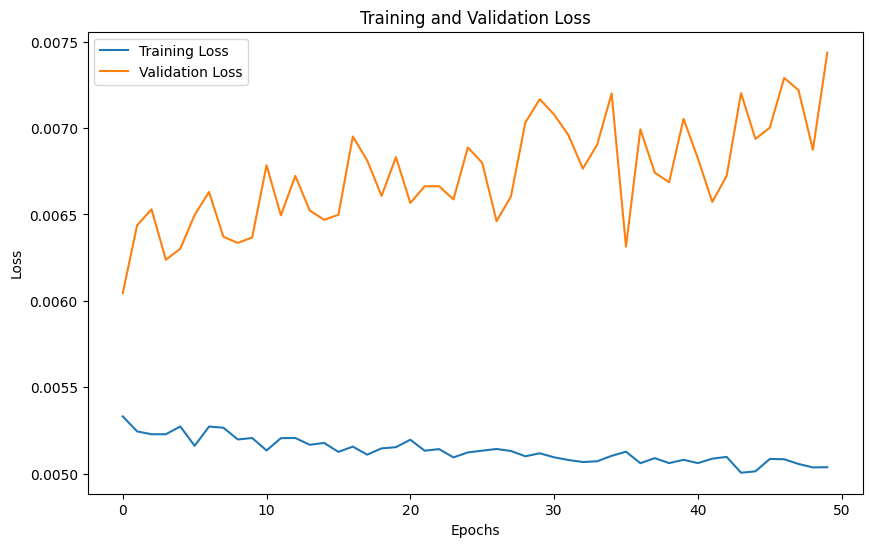

In [148]:
# Obter as perdas do treinamento e teste
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Plotar as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [149]:
# Avaliar o modelo
mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065
Mean Absolute Error: 0.006436566356569529


In [150]:
# Inverter a normalização das previsões
predictions_denormalized = scaler.inverse_transform(predictions)

# Arredondar os valores das previsões para números inteiros
predictions_integer = predictions_denormalized.round().astype(int)

# Visualizar as previsões como no DataFrame original
print(predictions_integer)

[[0]
 [0]
 [0]
 ...
 [8]
 [3]
 [0]]


In [155]:
# Converter as previsões de volta para números inteiros
predictions_denormalized = scaler.inverse_transform(predictions)
predictions_integer = predictions_denormalized.round().astype(int)

# Criar DataFrame com datas da base de teste
df_test = pd.DataFrame(index=df.index[-len(X_test):])

# Adicionar coluna de quantidades reais
df_test['Quantidade Real'] = df['quantidade'][-len(X_test):].values

# Adicionar coluna de previsões
df_test['Previsões'] = predictions_integer
df_test = df_test.loc[df_test['Quantidade Real'] > 0]
df_test = df_test.iloc[1:]
df_test

Quantidade Real  Previsões
data                                           
2015-10-20 12:00:00               19         18
2015-10-20 13:00:00               23         11
2015-10-20 15:00:00                6          3
2015-10-20 16:00:00                7         11
2015-10-20 17:00:00               19         15
...                              ...        ...
2015-12-31 19:00:00               23         12
2015-12-31 20:00:00               17         11
2015-12-31 21:00:00                7          8
2015-12-31 22:00:00                1          3
2015-12-31 23:00:00                1          0

[829 rows x 2 columns]

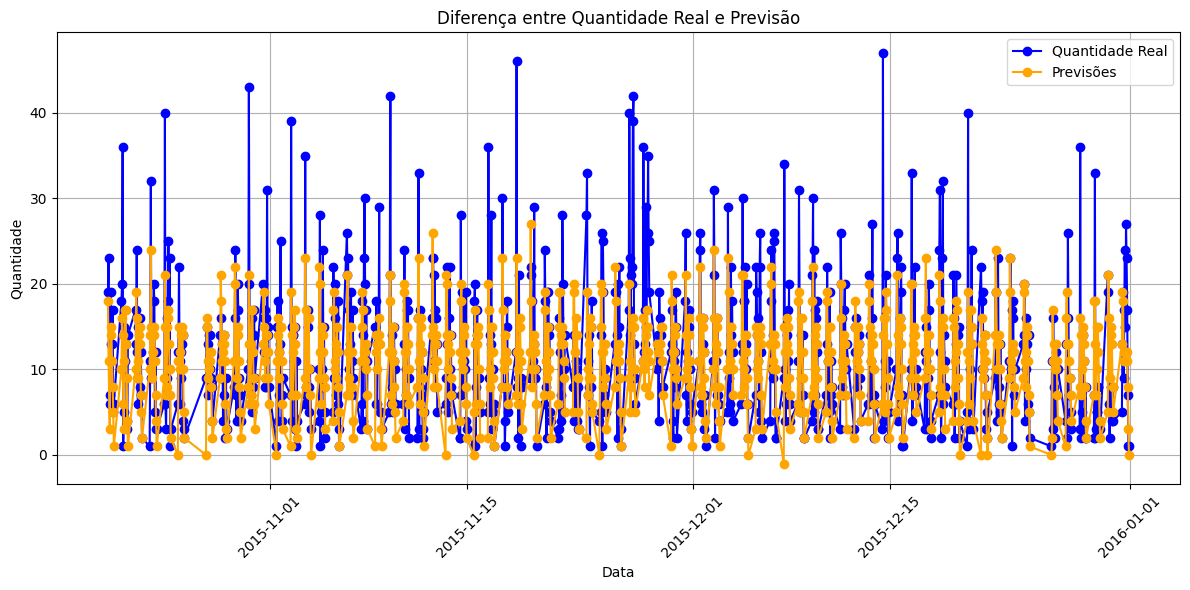

In [159]:
# Definir as datas como índices do DataFrame
df_test.index = pd.to_datetime(df_test.index)

# Criar o gráfico de duas linhas
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Quantidade Real'], marker='o', color='blue', label='Quantidade Real')
plt.plot(df_test.index, df_test['Previsões'], marker='o', color='orange', label='Previsões')
plt.title('Diferença entre Quantidade Real e Previsão')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
df_test.head()

Quantidade Real  Previsões
data                                           
2015-10-20 12:00:00               19         18
2015-10-20 13:00:00               23         11
2015-10-20 15:00:00                6          3
2015-10-20 16:00:00                7         11
2015-10-20 17:00:00               19         15

In [162]:
mae = mean_absolute_error(df_test['Quantidade Real'], df_test['Previsões'])
mae

5.214716525934861

In [ ]:
# Obter as perdas do treinamento e validação
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Continua...